# 1. GCN embeddings

### About this notebook

This notebook was used in the 50.039 Deep Learning course at the Singapore University of Technology and Design.

**Author:** Matthieu DE MARI (matthieu_demari@sutd.edu.sg)

**Version:** 1.1 (27/03/2022)

**Requirements:**
- Python 3 (tested on v3.9.6)
- Networkx
- Numpy (tested on v1.22.1)

In [1]:
import matplotlib.pyplot as plt
from networkx import karate_club_graph, to_numpy_matrix
import numpy as np

## 1. Identity propagation

In [2]:
# Adjacency matrix
A = np.matrix([
    [0, 1, 1, 0],
    [1, 0, 1, 1], 
    [1, 1, 0, 0],
    [0, 1, 0, 0]],
    dtype=float)
print("A:\n", A)

A:
 [[0. 1. 1. 0.]
 [1. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]]


In [3]:
# Feature matrix
H = np.matrix([[i+1, -i-1] for i in range(A.shape[0])])
print("H:\n", H)

H:
 [[ 1 -1]
 [ 2 -2]
 [ 3 -3]
 [ 4 -4]]


In [4]:
# Identity function as activation
def f_identity(x):
    return x

In [5]:
# Propagation rule
H_next = f_identity(A*H)
print("H_next:\n", H_next)

H_next:
 [[ 5. -5.]
 [ 8. -8.]
 [ 3. -3.]
 [ 2. -2.]]


## Adding self-loop features

In [6]:
# Identity matrix
I = np.matrix(np.eye(A.shape[0]))
# Define A_hat as A + I
A_hat = A + I
print("A:\n", A)
print("\n")
print("A_hat:\n", A_hat)

A:
 [[0. 1. 1. 0.]
 [1. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]]


A_hat:
 [[1. 1. 1. 0.]
 [1. 1. 1. 1.]
 [1. 1. 1. 0.]
 [0. 1. 0. 1.]]


In [7]:
# Propagation rule
H_next2 = f_identity(A_hat*H)
print("H_next:\n", H_next)
print("\n")
print("H_next2:\n", H_next2)

H_next:
 [[ 5. -5.]
 [ 8. -8.]
 [ 3. -3.]
 [ 2. -2.]]


H_next2:
 [[  6.  -6.]
 [ 10. -10.]
 [  6.  -6.]
 [  6.  -6.]]


## Enhancing the propagation rule #1: normalizing features

In [8]:
# Define the degree matrix
D = np.array(np.sum(A, axis = 0))[0]
D = np.matrix(np.diag(D))
print("D:\n", D)

D:
 [[2. 0. 0. 0.]
 [0. 3. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 0. 1.]]


In [9]:
# Invert degree matrix
D_inv = D**-1
print("D_inv:\n", D_inv)

D_inv:
 [[0.5        0.         0.         0.        ]
 [0.         0.33333333 0.         0.        ]
 [0.         0.         0.5        0.        ]
 [0.         0.         0.         1.        ]]


In [10]:
# Nomalization at a glance
N = D_inv*A
print("N:\n", N)

N:
 [[0.         0.5        0.5        0.        ]
 [0.33333333 0.         0.33333333 0.33333333]
 [0.5        0.5        0.         0.        ]
 [0.         1.         0.         0.        ]]


In [11]:
# Update propagation rule
H_next3 = f_identity(N*H)
print("H_next3:\n", H_next3)
print("H_next2:\n", H_next2)

H_next3:
 [[ 2.5        -2.5       ]
 [ 2.66666667 -2.66666667]
 [ 1.5        -1.5       ]
 [ 2.         -2.        ]]
H_next2:
 [[  6.  -6.]
 [ 10. -10.]
 [  6.  -6.]
 [  6.  -6.]]


## Enhancing the propagation rule #2: adding weights

In [12]:
# Weight matrix
W = np.matrix([[1, -1],[-1, 1]])
print("W:\n", W)

W:
 [[ 1 -1]
 [-1  1]]


In [13]:
# Define D_hat as the degree matrix of A_hat
D_hat = np.array(np.sum(A_hat, axis = 0))[0]
D_hat = np.matrix(np.diag(D_hat))
print("D_hat:\n", D_hat)

D_hat:
 [[3. 0. 0. 0.]
 [0. 4. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 2.]]


In [14]:
# Define N_hat (normalization)
N_hat = (D_hat**-1)*A_hat
print("N_hat:\n", N_hat)

N_hat:
 [[0.33333333 0.33333333 0.33333333 0.        ]
 [0.25       0.25       0.25       0.25      ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.5        0.         0.5       ]]


In [15]:
# Propagation rule
H_next4 = f_identity(N_hat*H)
print("H_next4:\n", H_next4)

H_next4:
 [[ 2.  -2. ]
 [ 2.5 -2.5]
 [ 2.  -2. ]
 [ 3.  -3. ]]


In [16]:
# Propagation rule
H_next4 = f_identity(N_hat*H*W)
print("H_next4:\n", H_next4)

H_next4:
 [[ 4. -4.]
 [ 5. -5.]
 [ 4. -4.]
 [ 6. -6.]]


## Enhancing the propagation rule #3: adding a proper activation function

In [17]:
# ReLU as activation function
def f_relu(X):
    # ReLU(X) = max(X, 0) implemented using fancy indexing
    X[X<0] = 0
    return X

In [18]:
# Propagation rule
H_next5 = f_relu(N_hat*H*W)
print("H_next5:\n", H_next5)

H_next5:
 [[4. 0.]
 [5. 0.]
 [4. 0.]
 [6. 0.]]


## Enhancing the propagation rule #4: Kipf propagation rule

In [19]:
# Half invert of a diagonal matrix
def half_invert(X):
    # Half inversion of a diagonal matrix
    for i in range(X.shape[0]):
        X[i,i] = X[i,i]**(-1/2)
    return X

In [20]:
# Half invert of degree matrix D_hat
D_halfinv = half_invert(D_hat)
print("D_halfinv:\n", D_halfinv)

D_halfinv:
 [[0.57735027 0.         0.         0.        ]
 [0.         0.5        0.         0.        ]
 [0.         0.         0.57735027 0.        ]
 [0.         0.         0.         0.70710678]]


In [21]:
# Kipf normalization (a.k.a. symmetric normalization)
N_kipf = D_halfinv*A_hat*D_halfinv
print("N_kipf:\n", N_kipf)

N_kipf:
 [[0.33333333 0.28867513 0.33333333 0.        ]
 [0.28867513 0.25       0.28867513 0.35355339]
 [0.33333333 0.28867513 0.33333333 0.        ]
 [0.         0.35355339 0.         0.5       ]]


In [22]:
# Compare conventional normalization and Kipf
print("N_hat:\n", N_hat)
print("\n")
print("N_kipf:\n", N_kipf)

N_hat:
 [[0.33333333 0.33333333 0.33333333 0.        ]
 [0.25       0.25       0.25       0.25      ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.5        0.         0.5       ]]


N_kipf:
 [[0.33333333 0.28867513 0.33333333 0.        ]
 [0.28867513 0.25       0.28867513 0.35355339]
 [0.33333333 0.28867513 0.33333333 0.        ]
 [0.         0.35355339 0.         0.5       ]]


In [23]:
# Propagation rule
H_next6 = f_relu(N_kipf*H*W)
print("H_next6:\n", H_next6)

H_next6:
 [[3.82136721 0.        ]
 [6.1378282  0.        ]
 [3.82136721 0.        ]
 [5.41421356 0.        ]]


## Applying these ideas to a graph dataset

In [24]:
# Fix numpy seed for reproducibility
seed_number = 28
#seed_number = 14
np.random.seed(seed_number)

In [25]:
# Import Zachary's karate club dataset
zkc = karate_club_graph()

In [26]:
# Check what is in zkc
print(zkc.__dict__)

{'graph': {'name': "Zachary's Karate Club"}, '_node': {0: {'club': 'Mr. Hi'}, 1: {'club': 'Mr. Hi'}, 2: {'club': 'Mr. Hi'}, 3: {'club': 'Mr. Hi'}, 4: {'club': 'Mr. Hi'}, 5: {'club': 'Mr. Hi'}, 6: {'club': 'Mr. Hi'}, 7: {'club': 'Mr. Hi'}, 8: {'club': 'Mr. Hi'}, 9: {'club': 'Officer'}, 10: {'club': 'Mr. Hi'}, 11: {'club': 'Mr. Hi'}, 12: {'club': 'Mr. Hi'}, 13: {'club': 'Mr. Hi'}, 14: {'club': 'Officer'}, 15: {'club': 'Officer'}, 16: {'club': 'Mr. Hi'}, 17: {'club': 'Mr. Hi'}, 18: {'club': 'Officer'}, 19: {'club': 'Mr. Hi'}, 20: {'club': 'Officer'}, 21: {'club': 'Mr. Hi'}, 22: {'club': 'Officer'}, 23: {'club': 'Officer'}, 24: {'club': 'Officer'}, 25: {'club': 'Officer'}, 26: {'club': 'Officer'}, 27: {'club': 'Officer'}, 28: {'club': 'Officer'}, 29: {'club': 'Officer'}, 30: {'club': 'Officer'}, 31: {'club': 'Officer'}, 32: {'club': 'Officer'}, 33: {'club': 'Officer'}}, '_adj': {0: {1: {'weight': 4}, 2: {'weight': 5}, 3: {'weight': 3}, 4: {'weight': 3}, 5: {'weight': 3}, 6: {'weight': 3}, 

In [27]:
nodes_index_list = []
for node_key, node_value in zkc._node.items():
    print("Node index: {}, node labels: {}".format(node_key, node_value))
    nodes_index_list.append(node_key)

Node index: 0, node labels: {'club': 'Mr. Hi'}
Node index: 1, node labels: {'club': 'Mr. Hi'}
Node index: 2, node labels: {'club': 'Mr. Hi'}
Node index: 3, node labels: {'club': 'Mr. Hi'}
Node index: 4, node labels: {'club': 'Mr. Hi'}
Node index: 5, node labels: {'club': 'Mr. Hi'}
Node index: 6, node labels: {'club': 'Mr. Hi'}
Node index: 7, node labels: {'club': 'Mr. Hi'}
Node index: 8, node labels: {'club': 'Mr. Hi'}
Node index: 9, node labels: {'club': 'Officer'}
Node index: 10, node labels: {'club': 'Mr. Hi'}
Node index: 11, node labels: {'club': 'Mr. Hi'}
Node index: 12, node labels: {'club': 'Mr. Hi'}
Node index: 13, node labels: {'club': 'Mr. Hi'}
Node index: 14, node labels: {'club': 'Officer'}
Node index: 15, node labels: {'club': 'Officer'}
Node index: 16, node labels: {'club': 'Mr. Hi'}
Node index: 17, node labels: {'club': 'Mr. Hi'}
Node index: 18, node labels: {'club': 'Officer'}
Node index: 19, node labels: {'club': 'Mr. Hi'}
Node index: 20, node labels: {'club': 'Officer

In [28]:
# Retrieve node labels
nodes_labels = [node_value['club'] for node_value in zkc._node.values()]
print("nodes_labels:\n", nodes_labels)

nodes_labels:
 ['Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Officer', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Officer', 'Officer', 'Mr. Hi', 'Mr. Hi', 'Officer', 'Mr. Hi', 'Officer', 'Mr. Hi', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer']


In [29]:
# Retrieve node labels (binary representation)
nodes_labels_binary = [int(node_value['club'] == 'Mr. Hi') for node_value in zkc._node.values()]
print("nodes_labels_binary:\n", nodes_labels_binary)

nodes_labels_binary:
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [30]:
print("nodes_index_list: ", nodes_index_list)
number_of_nodes = len(nodes_index_list)
print("number_of_nodes: ", number_of_nodes)

nodes_index_list:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
number_of_nodes:  34


In [31]:
# Retrieve adjacency matrix
A = to_numpy_matrix(zkc, nodelist = nodes_index_list)
print("A:\n", A)

A:
 [[0. 4. 5. ... 2. 0. 0.]
 [4. 0. 6. ... 0. 0. 0.]
 [5. 6. 0. ... 0. 2. 0.]
 ...
 [2. 0. 0. ... 0. 4. 4.]
 [0. 0. 2. ... 4. 0. 5.]
 [0. 0. 0. ... 4. 5. 0.]]


In [32]:
# Reconstruct A_hat
I = np.eye(number_of_nodes)
A_hat = A + I
print("A_hat:\n", A_hat)

A_hat:
 [[1. 4. 5. ... 2. 0. 0.]
 [4. 1. 6. ... 0. 0. 0.]
 [5. 6. 1. ... 0. 2. 0.]
 ...
 [2. 0. 0. ... 1. 4. 4.]
 [0. 0. 2. ... 4. 1. 5.]
 [0. 0. 0. ... 4. 5. 1.]]


In [33]:
# Reconstruct D_hat
D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat = np.matrix(np.diag(D_hat))
print("D_hat:\n", D_hat)

D_hat:
 [[43.  0.  0. ...  0.  0.  0.]
 [ 0. 30.  0. ...  0.  0.  0.]
 [ 0.  0. 34. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 22.  0.  0.]
 [ 0.  0.  0. ...  0. 39.  0.]
 [ 0.  0.  0. ...  0.  0. 49.]]


In [34]:
# Graph features matrix (no features here, so let us use an identity matrix instead)
H = np.eye(number_of_nodes)
print("H:\n", H)

H:
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [35]:
# Initialize weights for two layers, using Normal(0,1) random variables
W1 = np.random.normal(loc = 0, scale = 1, size = (number_of_nodes, 4))
W2 = np.random.normal(loc = 0, size = (W1.shape[1], 2))
print("W1:\n", W1)
print("\n")
print("W2:\n", W2)

W1:
 [[ 0.44633238  1.66912005 -0.26427996 -0.96783493]
 [ 0.05918843  1.51461999  0.33687044 -0.3023687 ]
 [-0.8386418  -0.51773125  0.25350786 -2.48470399]
 [-0.65141987 -1.77546915  0.23428583  1.23939986]
 [-0.65033427 -0.26621493 -0.53871977  0.42074053]
 [-0.09528633 -0.7698761  -0.18372453  0.17680895]
 [ 0.73705619  0.69386264 -0.81553033  0.38768045]
 [ 0.10653701 -0.31457692 -0.69971286  0.05298828]
 [ 0.93410784  1.45987213 -1.57887712  0.95226643]
 [-0.60245944  0.46144492 -0.00395915  0.77734803]
 [-0.49311281  0.60853086  0.31423418 -0.71130376]
 [ 1.00529604  0.21125897 -0.87314884  0.98415707]
 [-0.07020317  1.77872202 -0.04265609  0.04648015]
 [ 1.00089957  1.32104666  1.17109629 -0.78519484]
 [ 0.50371582 -2.20968693  0.22183904 -2.20445282]
 [ 0.66817163 -0.45268082 -1.48626246  0.93678017]
 [ 0.31401692  0.21869421  0.65818808  0.4394821 ]
 [ 0.25655415  0.22487616  1.45768767 -1.54225597]
 [-1.4858283  -0.48685766  0.23442597 -0.05697024]
 [ 1.51424981 -1.37437529 

In [36]:
# Propagation rule as a function (normalized ReLU)
def gcn_normalized_layer(A_hat, D_hat, H, W):
    return f_relu((D_hat**-1)*A_hat*H*W)

In [37]:
# Compute output for GCN normalized layer 1
H_layer1 = gcn_normalized_layer(A_hat, D_hat, H, W1)
# Compute output for GCN normalized layer 2
H_layer2 = gcn_normalized_layer(A_hat, D_hat, H_layer1, W2)
print("H_layer1:\n", H_layer1)
print("H_layer2:\n", H_layer2)

H_layer1:
 [[0.15040903 0.14079563 0.         0.        ]
 [0.23049084 0.14973362 0.00568224 0.        ]
 [0.12524435 0.73224139 0.         0.        ]
 [0.07689039 0.76727013 0.13151384 0.        ]
 [0.07593742 0.88382923 0.         0.        ]
 [0.29278027 0.6792315  0.         0.        ]
 [0.08864314 0.14110679 0.         0.03772484]
 [0.         0.12034362 0.13114985 0.        ]
 [0.         0.19370894 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.09316643 0.         0.        ]
 [0.58607329 1.30465478 0.         0.        ]
 [0.         0.         0.07918429 0.55936896]
 [0.         0.38549106 0.13026466 0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.07742335]
 [0.31990379 0.         0.         0.30470719]
 [0.30210183 1.26943406 0.31649955 0.        ]
 [0.         0.         0.         0.        ]
 [0.15411013 0.82756933 0.         0.        ]
 [0.         0.         0.         0.01063338]
 [

In [38]:
nodes_embeddings = {node: np.array(H_layer2)[node] for node in zkc.nodes()}
print(nodes_embeddings)

{0: array([1.02759203, 0.        ]), 1: array([0.955275, 0.      ]), 2: array([0.40917991, 0.        ]), 3: array([0.5249003 , 0.03185768]), 4: array([0.38736132, 0.02007305]), 5: array([0.34266261, 0.09182252]), 6: array([0.82602524, 0.09887123]), 7: array([0.81619518, 0.        ]), 8: array([0.55880777, 0.13315363]), 9: array([0.32080581, 0.12570832]), 10: array([0.99933252, 0.02306764]), 11: array([0.8925048 , 0.04565505]), 12: array([0.84334524, 0.01631977]), 13: array([0.63717158, 0.03088283]), 14: array([0.01746928, 0.16162146]), 15: array([0.01993596, 0.19085673]), 16: array([0.72607413, 0.08968982]), 17: array([0.85968158, 0.        ]), 18: array([0.01760343, 0.16222727]), 19: array([0.5007797 , 0.06605082]), 20: array([0.01568195, 0.14698085]), 21: array([0.78068651, 0.03737161]), 22: array([0.01955721, 0.20006739]), 23: array([0.12207066, 0.        ]), 24: array([0.29176402, 0.        ]), 25: array([0.40898858, 0.        ]), 26: array([0.09443033, 0.17353834]), 27: array([0.6

In [39]:
# Display our embeddings
def display_after_embedding(nodes_embeddings, nodes_labels_binary):
    plt.figure(figsize = (7, 5))
    for node_key, node_value in nodes_embeddings.items():
        label_bool = nodes_labels_binary[node_key]
        marker_node = '+' if label_bool else 'o'
        color_node = 'b' if label_bool else 'r'
        plt.scatter(node_value[0], node_value[1], color = color_node, marker = marker_node)
    plt.plot()
    plt.show()

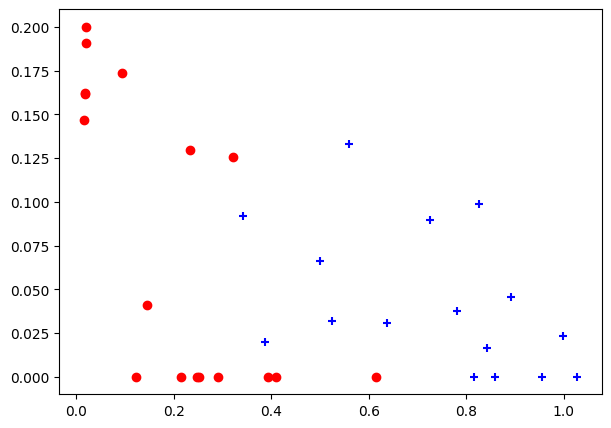

In [40]:
display_after_embedding(nodes_embeddings, nodes_labels_binary)

## Applying these ideas to a graph dataset - Kipf normalization

In [41]:
# Fix numpy seed for reproducibility
seed_number = 121
np.random.seed(seed_number)

In [42]:
# Initialize weights for two layers, using Normal(0,1) random variables
W1 = np.random.normal(loc = 0, scale = 1, size = (number_of_nodes, 4))
W2 = np.random.normal(loc = 0, size = (W1.shape[1], 2))
print("W1:\n", W1)
print("\n")
print("W2:\n", W2)

W1:
 [[-2.12033165e-01 -2.84929170e-01 -5.73898209e-01 -4.40310167e-01]
 [-3.30110555e-01  1.18369457e+00  1.61537293e+00  3.67062470e-01]
 [-1.41193100e-02  6.29641797e-01  1.70964074e+00 -1.32698736e+00]
 [ 4.01873123e-01 -1.91426666e-01  1.40382596e+00 -1.96876855e+00]
 [-7.90415162e-01 -7.32721605e-01  8.77438211e-02 -5.00285999e-01]
 [ 5.04114441e-01  6.07406100e-01  1.16644959e+00  8.24424421e-01]
 [-3.08672460e+00  1.16434226e+00  1.08265161e+00  4.85795994e-01]
 [-1.23488428e+00 -1.85888172e+00  4.88156281e-01  3.85894995e-01]
 [-2.26521488e-01  1.07671161e-01  1.71999521e+00  1.04079381e+00]
 [-2.44410648e+00 -8.58170660e-02 -9.48240269e-01 -2.47713448e+00]
 [ 1.06287650e+00  2.19250534e-01  7.25935861e-01  1.94107566e-02]
 [-1.37278961e+00  4.96968485e-01  3.12543021e-01  2.86478815e-01]
 [-9.35590717e-01 -9.02731092e-01  8.63507235e-01  9.50108784e-01]
 [ 7.09047261e-01  6.28473225e-01 -2.58758006e-02  1.39789293e+00]
 [ 6.60855946e-01  1.08614350e+00 -3.04687917e-02 -6.9096

In [43]:
# Propagation rule as a function (Kipf ReLU)
def gcn_kipf_layer(A_hat, D_hat, H, W):
    D_halfinv = half_invert(D_hat)
    return f_relu(D_halfinv*A_hat*D_halfinv*H*W)

In [44]:
# Compute output for GCN Kipf layer 1
H_layer1 = gcn_kipf_layer(A_hat, D_hat, H, W1)
# Compute output for GCN Kipf layer 2
H_layer2 = gcn_kipf_layer(A_hat, D_hat, H_layer1, W2)
print("H_layer1:\n", H_layer1)
print("H_layer2:\n", H_layer2)

H_layer1:
 [[0.         0.11890247 1.66163209 0.        ]
 [0.         0.         0.88594908 0.        ]
 [0.         0.         0.92072384 0.        ]
 [0.         0.         0.76980409 0.32984961]
 [0.         0.15567441 0.35710982 0.        ]
 [0.         0.7142124  0.31088621 0.        ]
 [0.         0.38512163 0.15605861 0.        ]
 [0.         0.15525754 0.87504342 0.        ]
 [0.         0.10287814 0.22238644 0.        ]
 [0.         0.06872194 0.         0.        ]
 [0.         0.         0.3527377  0.00349577]
 [0.         0.05906518 0.         0.        ]
 [0.         0.         0.56565043 0.        ]
 [0.         0.32976934 0.68309461 0.        ]
 [0.         0.38710616 0.07219977 0.10650622]
 [0.         0.03112125 0.1208285  0.2039376 ]
 [0.         0.65219319 0.54269253 0.13440225]
 [0.         0.         0.2628014  0.        ]
 [0.         0.14958268 0.         0.        ]
 [0.         0.13197999 0.44281924 0.        ]
 [0.         0.50729385 0.         0.41785027]
 [

In [45]:
nodes_embeddings = {node: np.array(H_layer2)[node] for node in zkc.nodes()}
print(nodes_embeddings)

{0: array([  7.06107402, 162.67815216]), 1: array([  3.3949889 , 150.14355163]), 2: array([  4.46656466, 178.76402553]), 3: array([ 2.06782733, 97.79321307]), 4: array([ 1.3007235 , 37.09720131]), 5: array([ 4.81724709, 69.87277452]), 6: array([ 6.43518458, 80.94112482]), 7: array([ 0.        , 61.38472656]), 8: array([ 0.19773389, 64.66256216]), 9: array([0.04212646, 4.09619316]), 10: array([ 2.70908772, 40.69547796]), 11: array([ 0.40923126, 21.58032313]), 12: array([ 0.        , 10.61391264]), 13: array([ 0.27774331, 77.32705415]), 14: array([ 0.        , 12.91140766]), 15: array([ 0.        , 12.45352671]), 16: array([ 3.30860076, 27.15592392]), 17: array([ 0.25525601, 17.90388545]), 18: array([0.01037096, 4.35856181]), 19: array([ 0.37618452, 24.64098217]), 20: array([ 0.        , 10.97784642]), 21: array([ 0.28915917, 22.06397366]), 22: array([0.04996043, 9.28027103]), 23: array([ 0.        , 42.57908003]), 24: array([0.32708657, 9.42825329]), 25: array([0., 0.]), 26: array([0., 

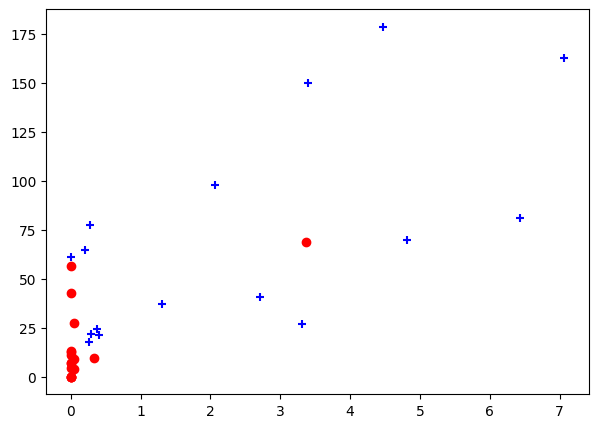

In [46]:
# Display our embeddings
display_after_embedding(nodes_embeddings, nodes_labels_binary)

## Draft: seed finder for appropriate representations

---
seed_number:  1


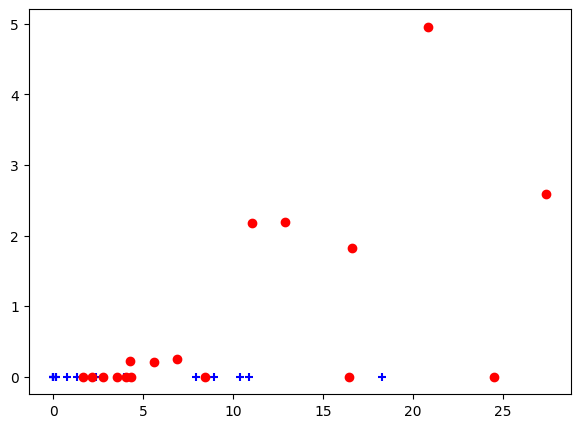

---
seed_number:  2


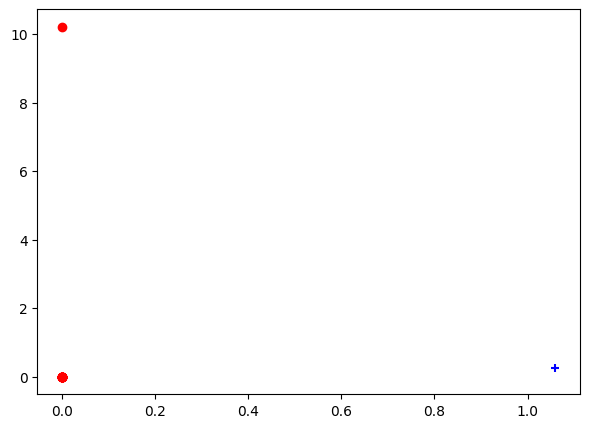

---
seed_number:  3


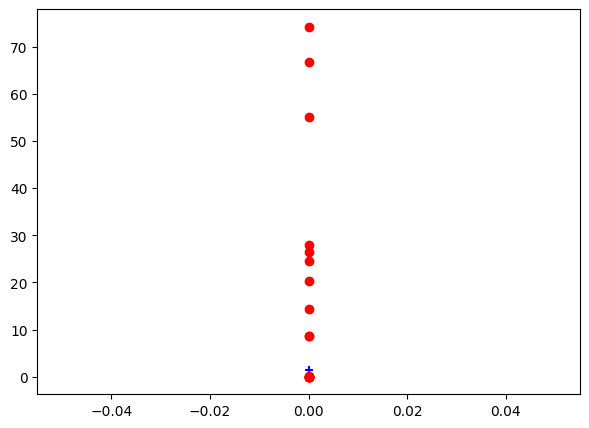

---
seed_number:  4


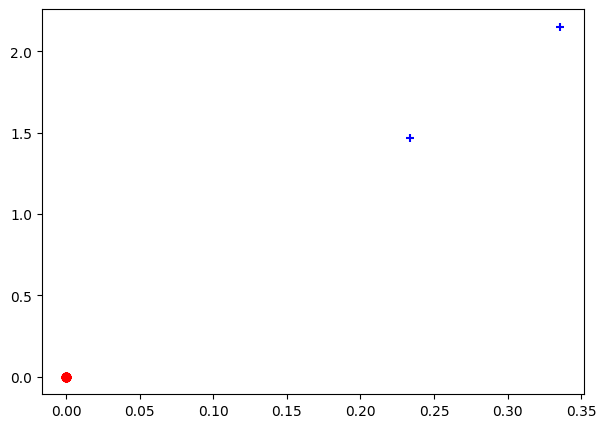

---
seed_number:  5


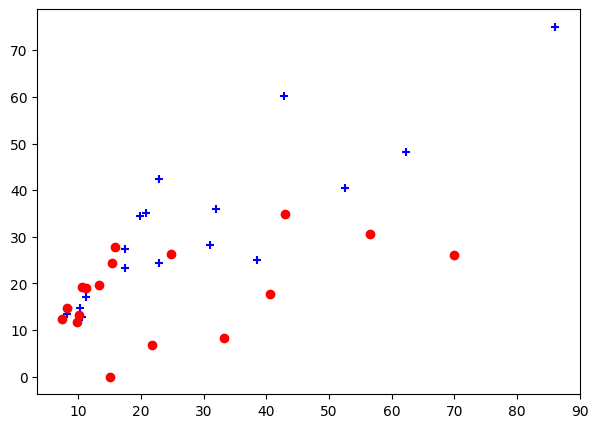

---
seed_number:  6


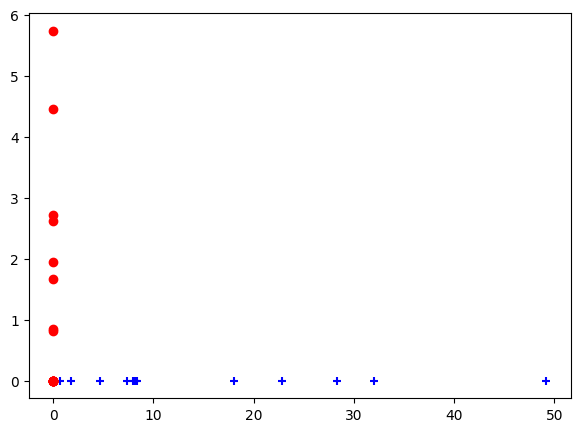

---
seed_number:  7


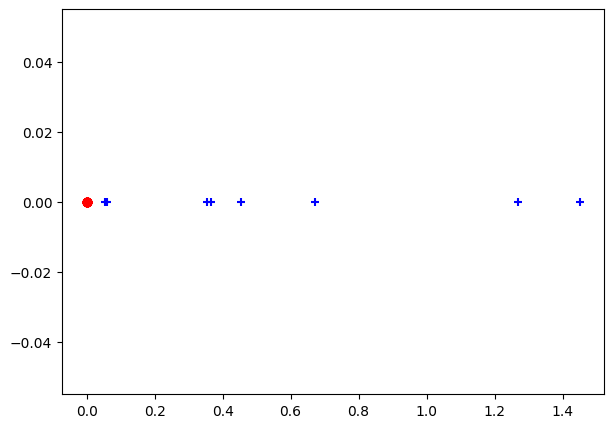

---
seed_number:  8


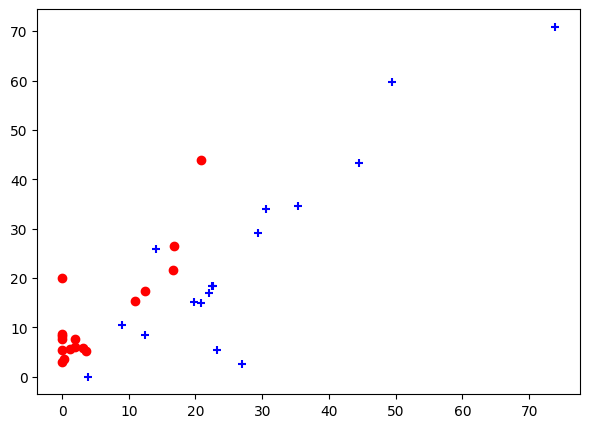

---
seed_number:  9


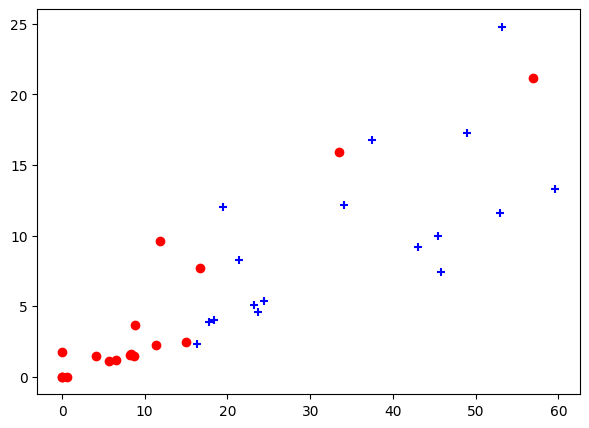

---
seed_number:  10


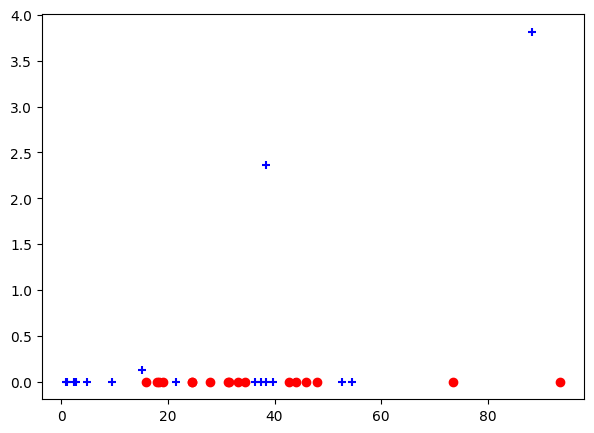

---
seed_number:  11


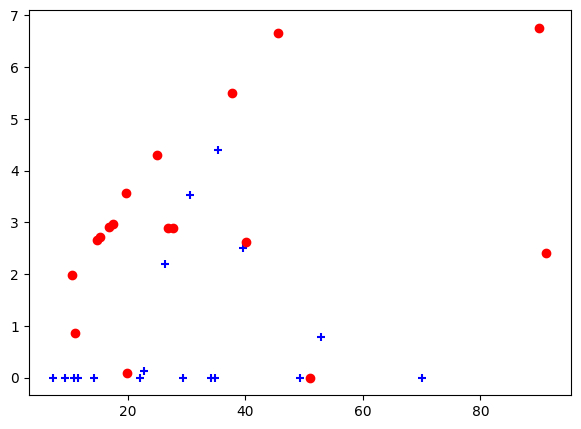

---
seed_number:  12


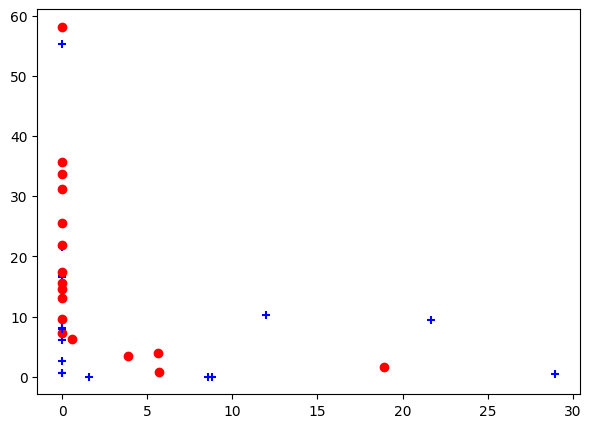

---
seed_number:  13


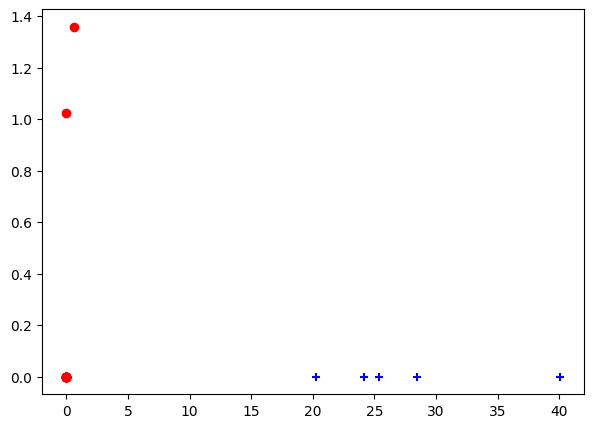

---
seed_number:  14


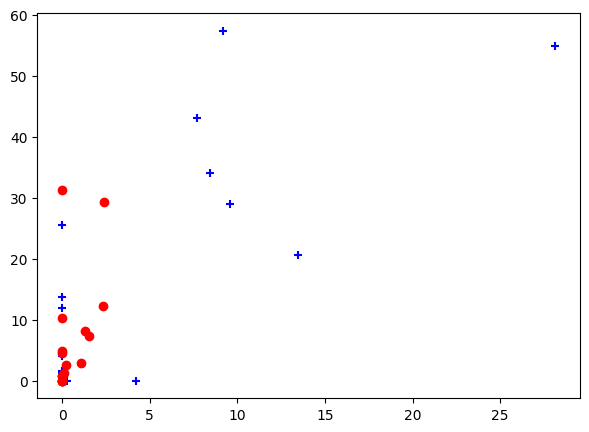

---
seed_number:  15


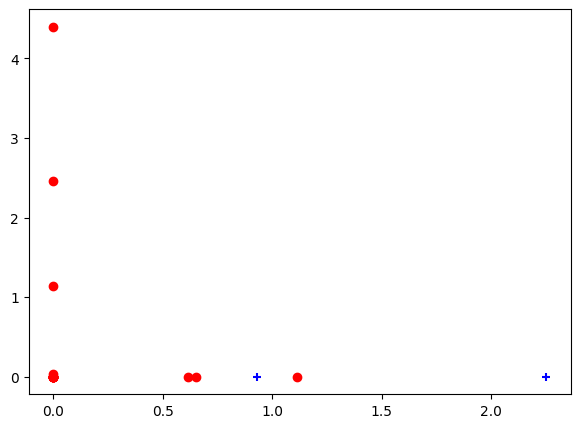

---
seed_number:  16


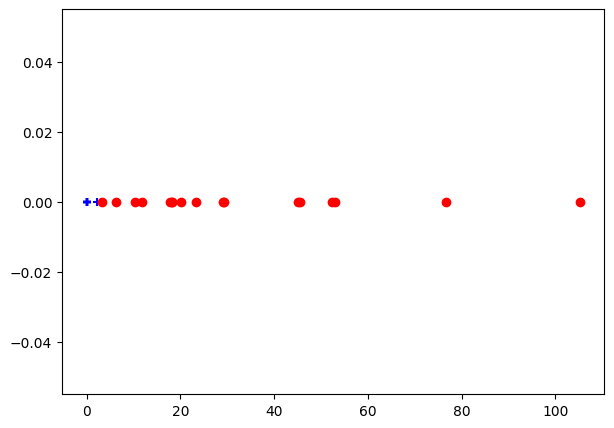

---
seed_number:  17


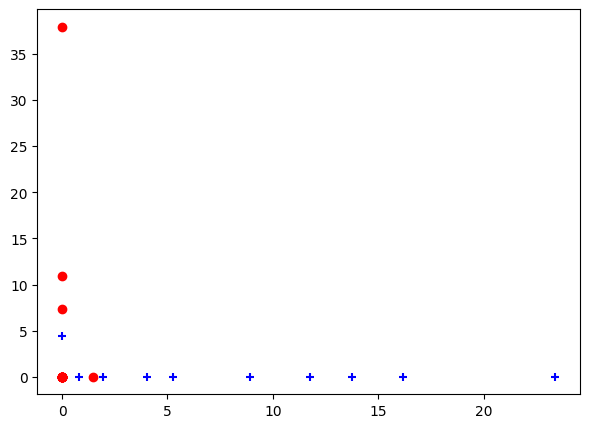

---
seed_number:  18


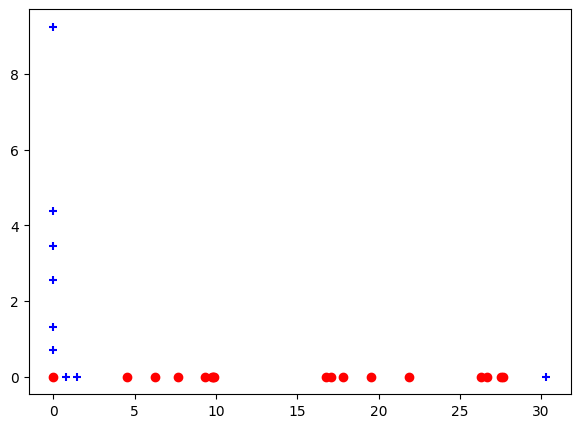

---
seed_number:  19


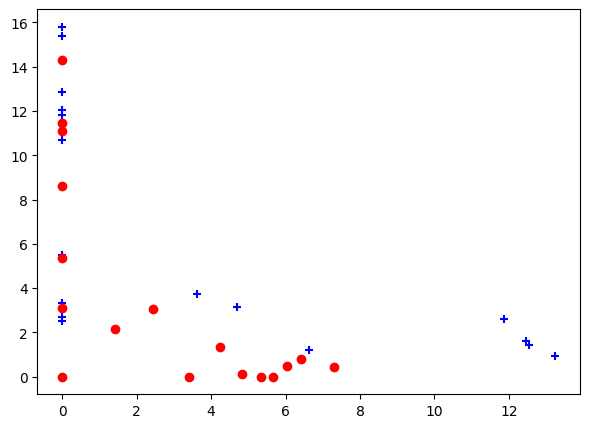

---
seed_number:  20


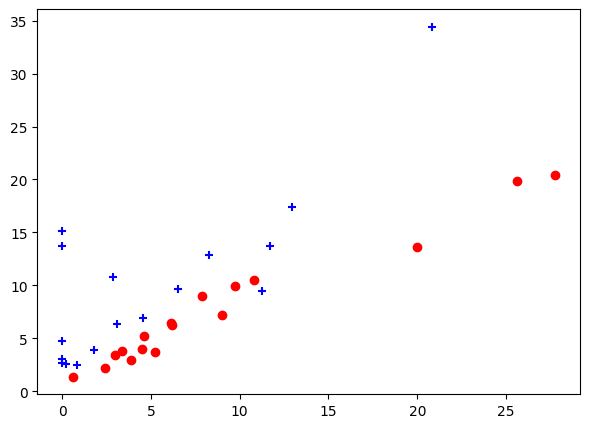

---
seed_number:  21


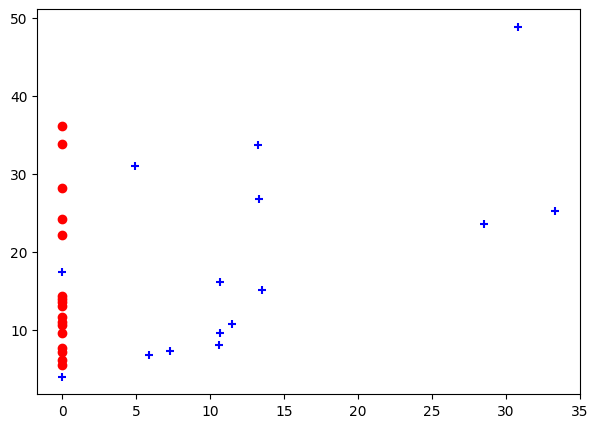

---
seed_number:  22


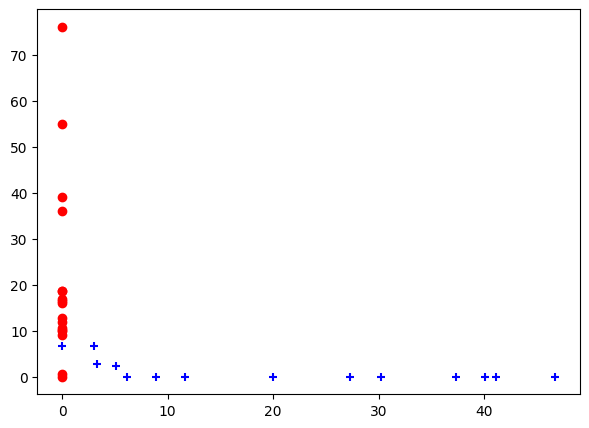

---
seed_number:  23


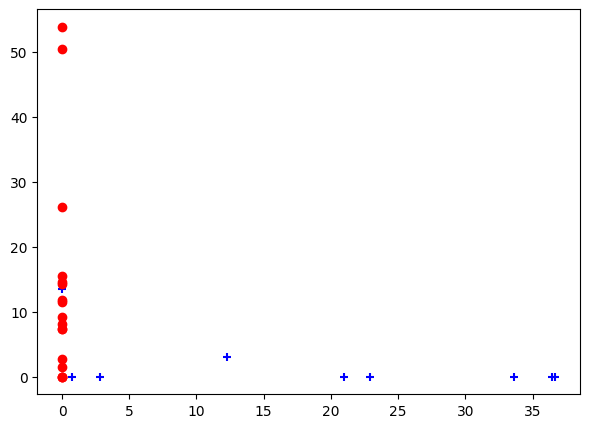

---
seed_number:  24


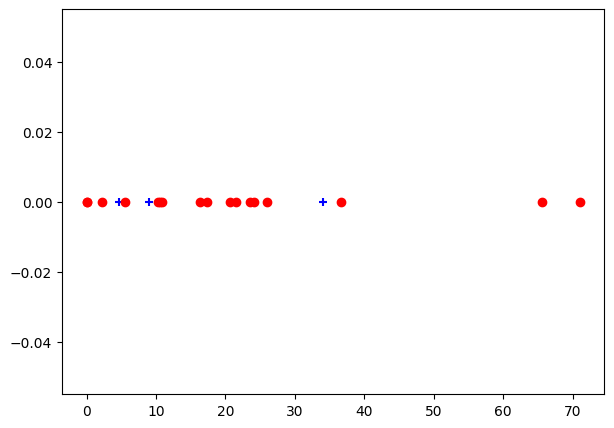

---
seed_number:  25


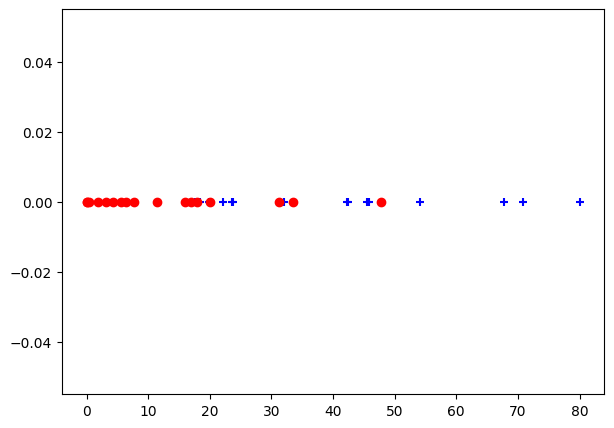

---
seed_number:  26


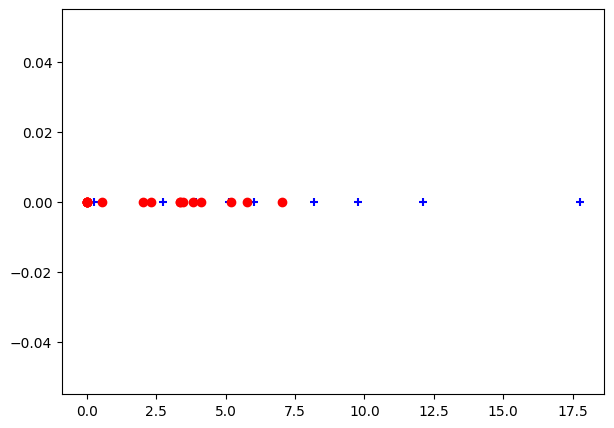

---
seed_number:  27


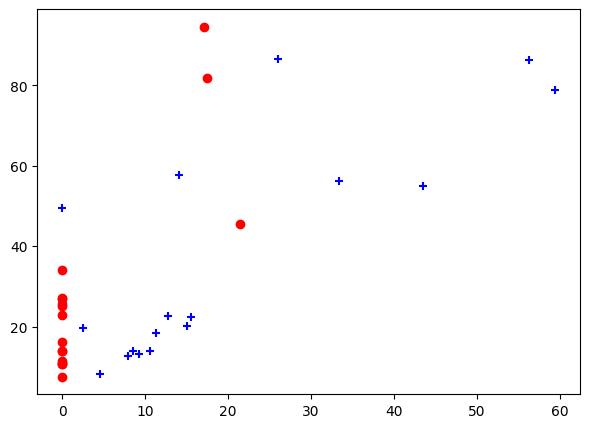

---
seed_number:  28


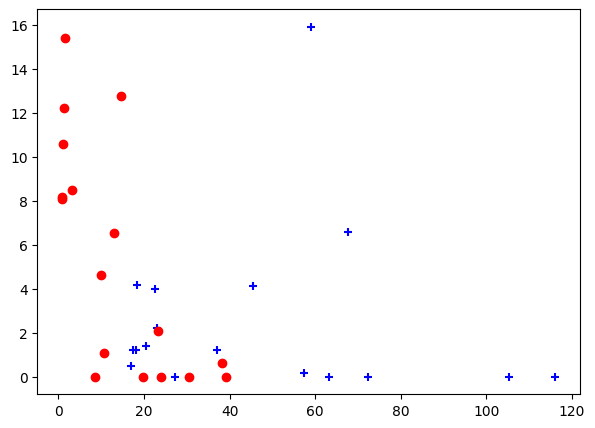

---
seed_number:  29


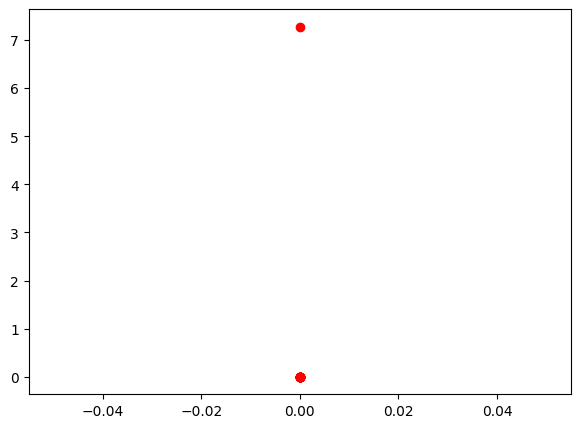

---
seed_number:  30


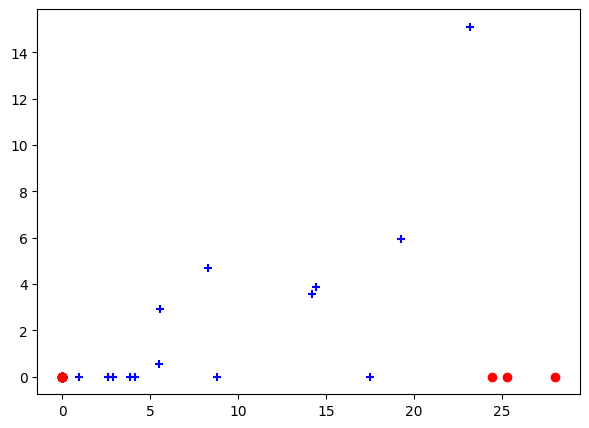

---
seed_number:  31


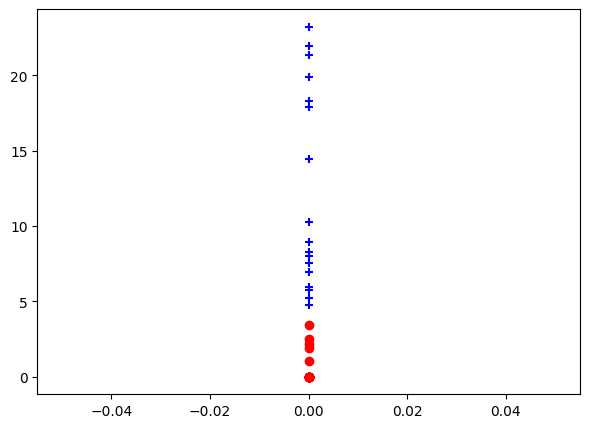

---
seed_number:  32


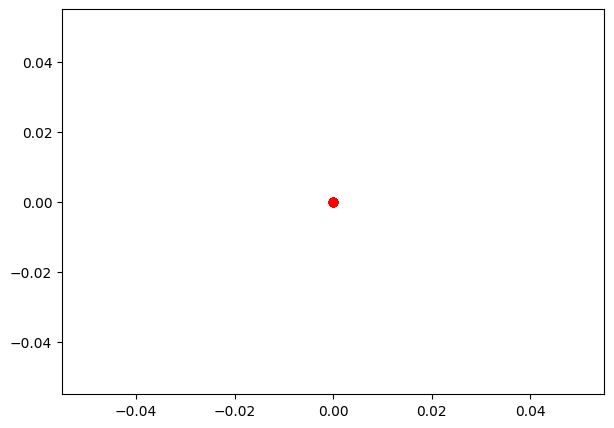

---
seed_number:  33


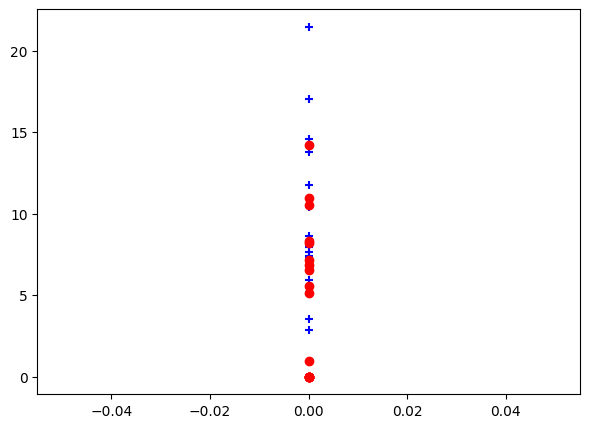

---
seed_number:  34


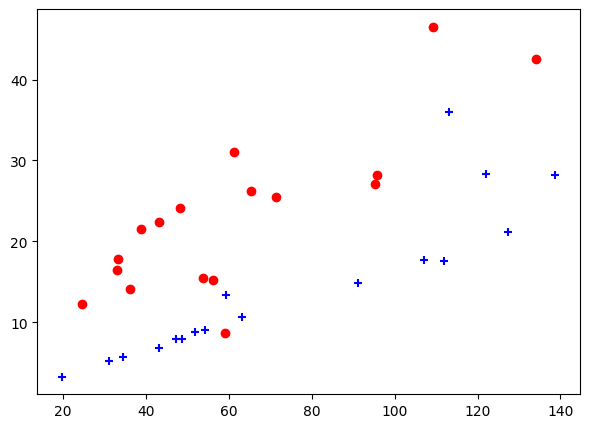

---
seed_number:  35


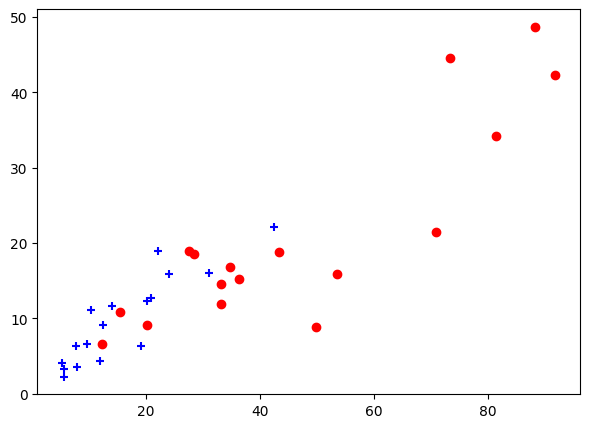

---
seed_number:  36


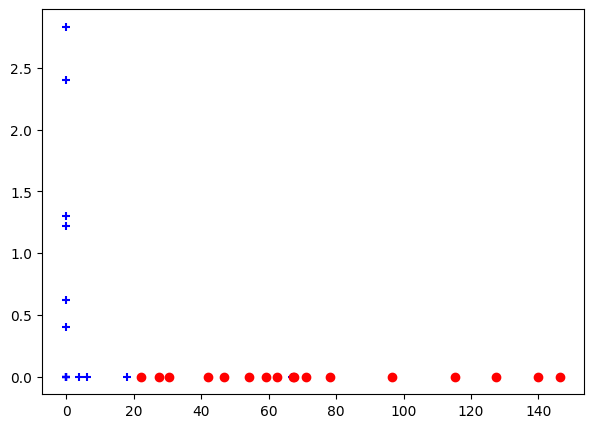

---
seed_number:  37


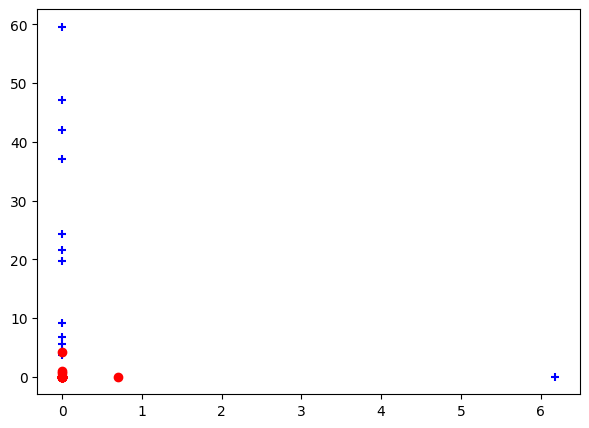

---
seed_number:  38


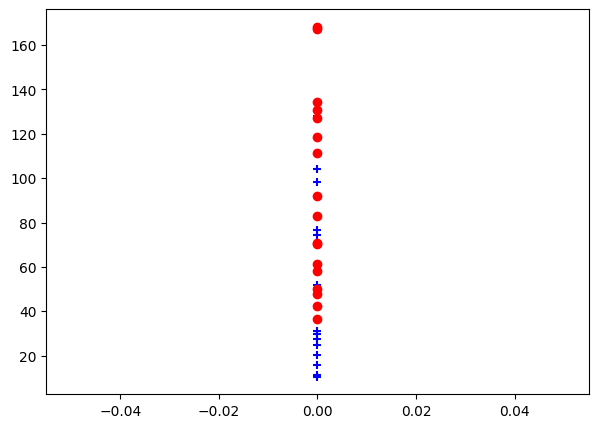

---
seed_number:  39


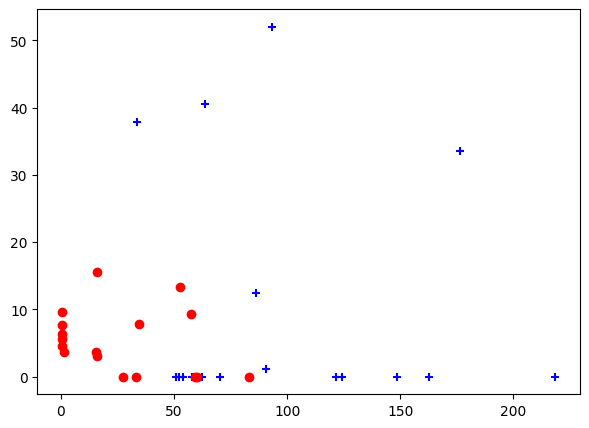

---
seed_number:  40


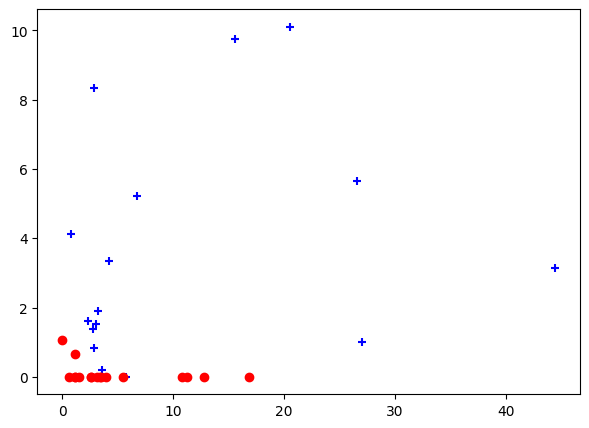

---
seed_number:  41


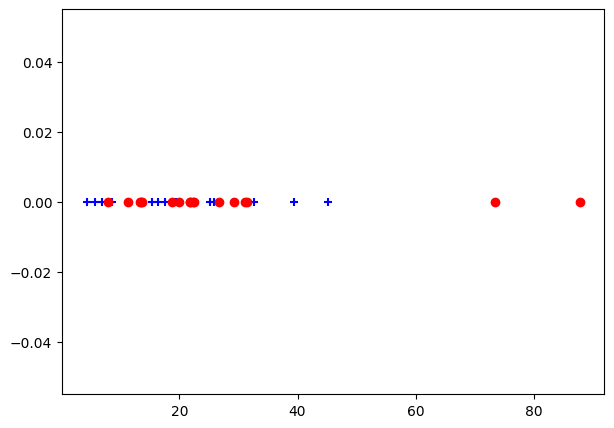

---
seed_number:  42


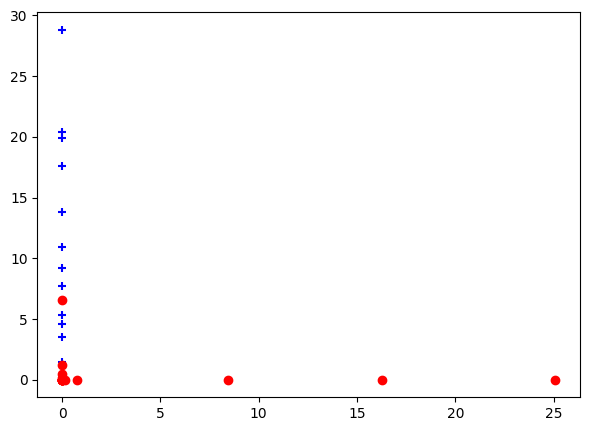

---
seed_number:  43


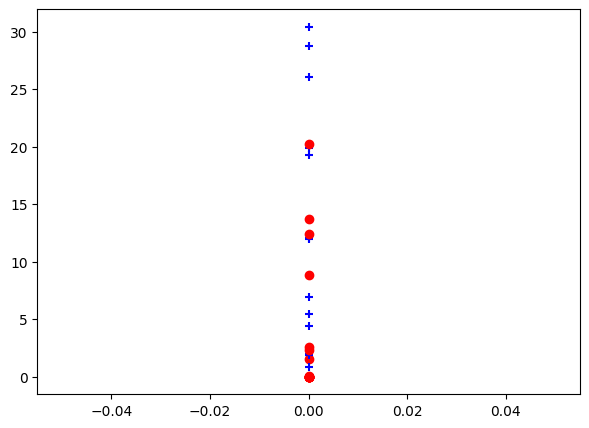

---
seed_number:  44


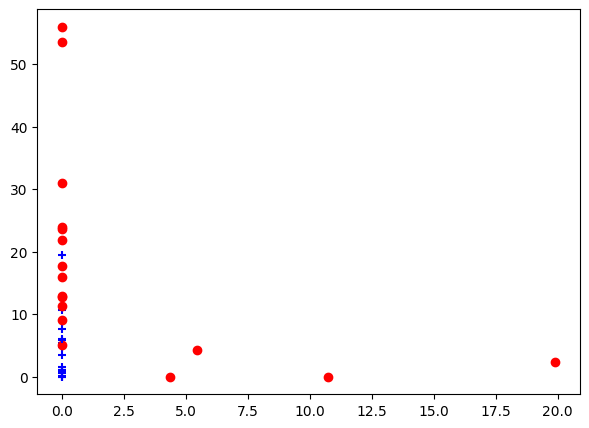

---
seed_number:  45


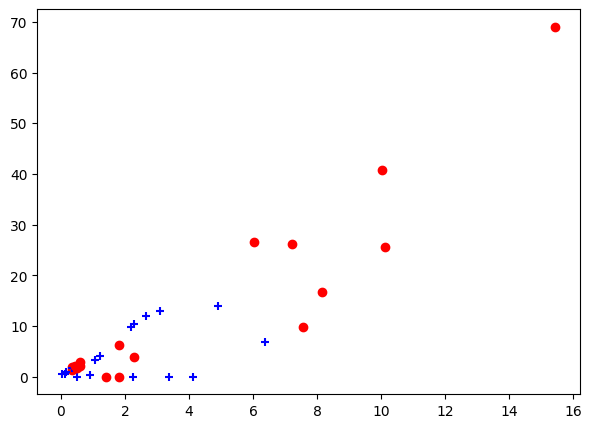

---
seed_number:  46


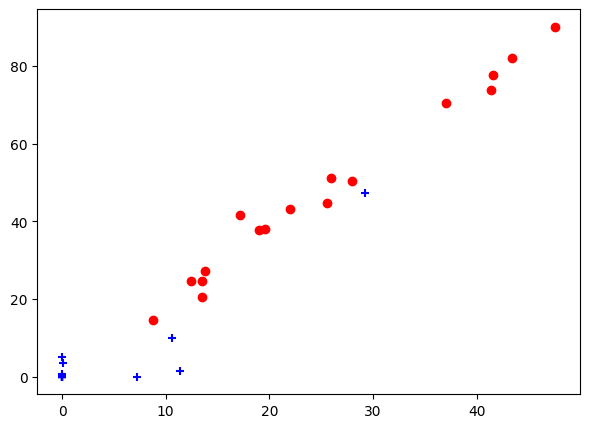

---
seed_number:  47


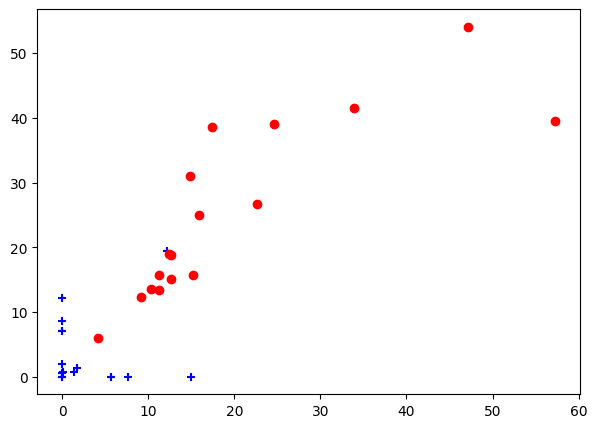

---
seed_number:  48


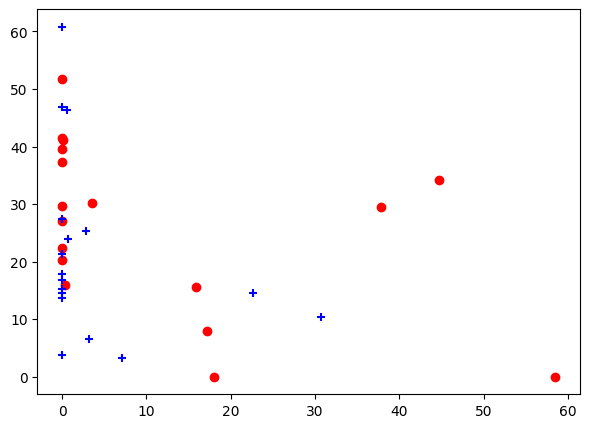

---
seed_number:  49


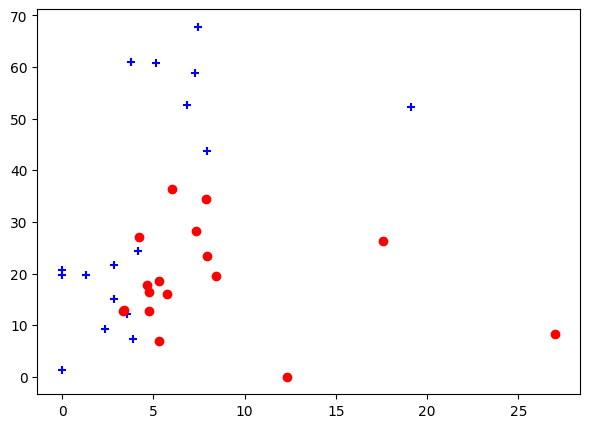

---
seed_number:  50


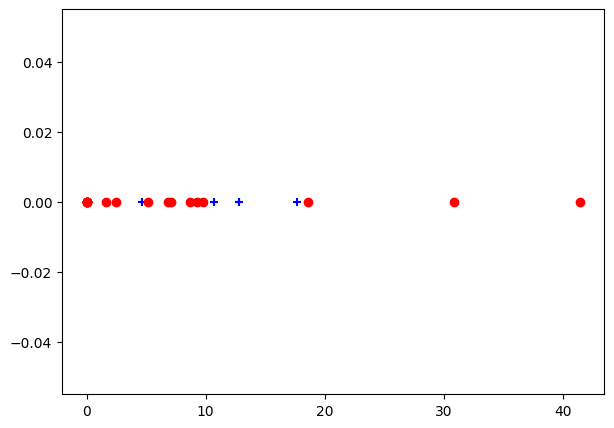

---
seed_number:  51


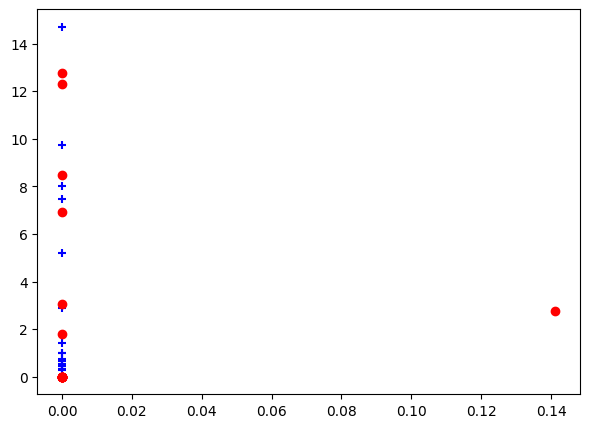

---
seed_number:  52


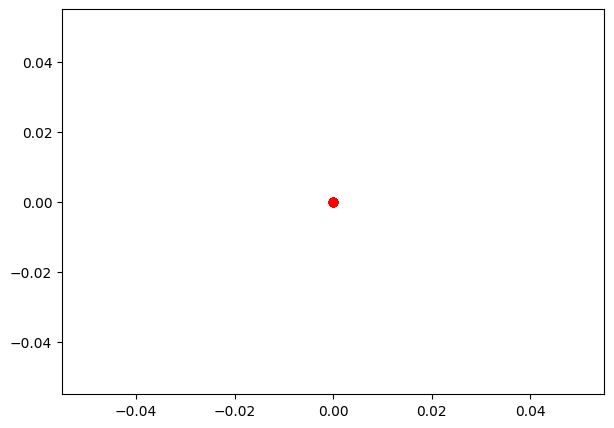

---
seed_number:  53


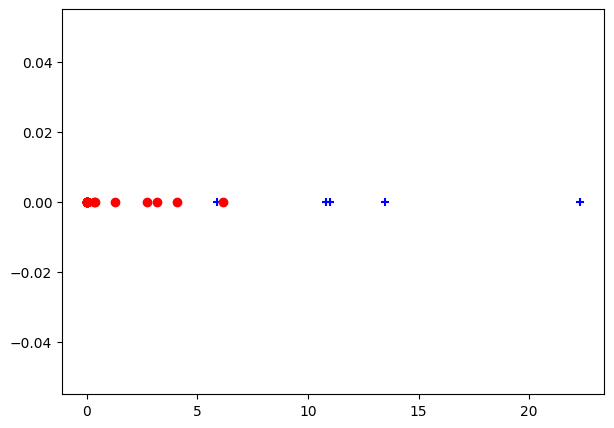

---
seed_number:  54


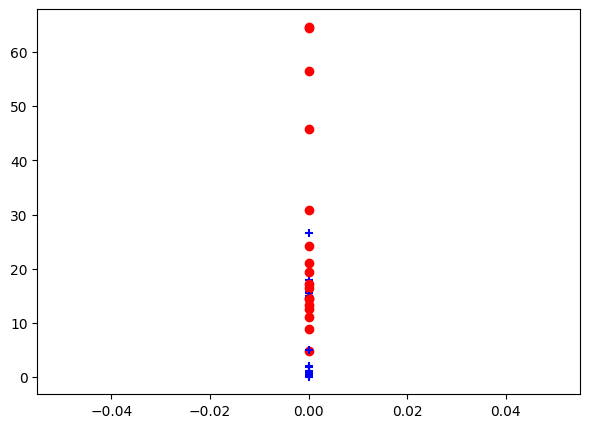

---
seed_number:  55


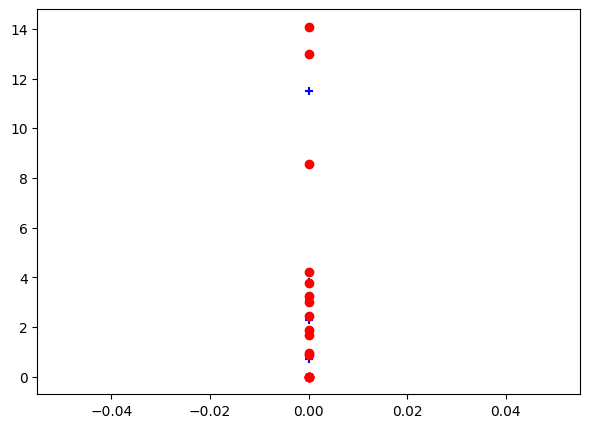

---
seed_number:  56


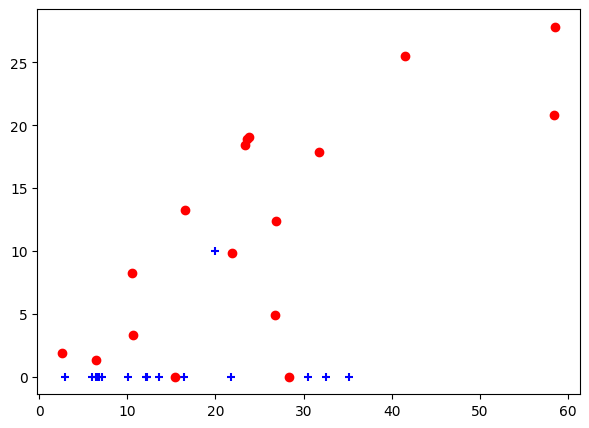

---
seed_number:  57


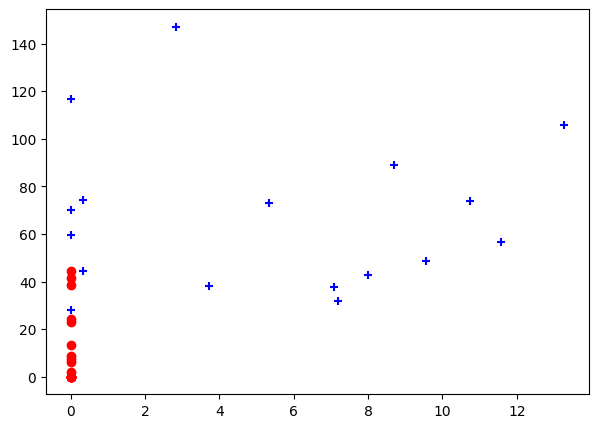

---
seed_number:  58


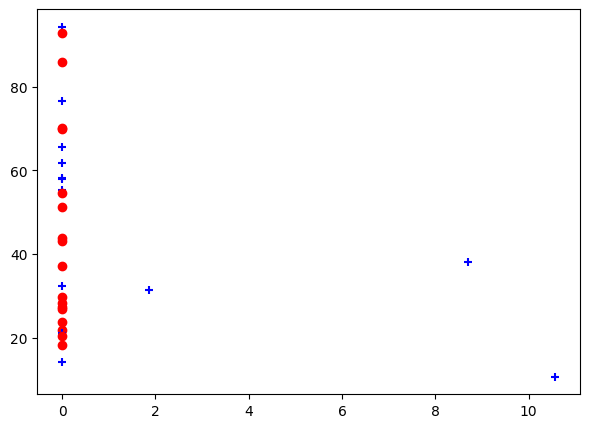

---
seed_number:  59


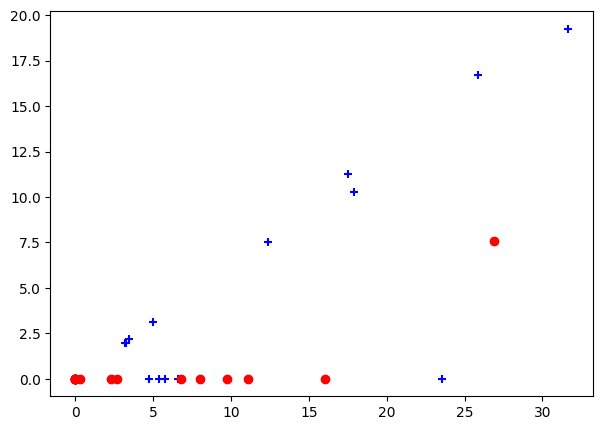

---
seed_number:  60


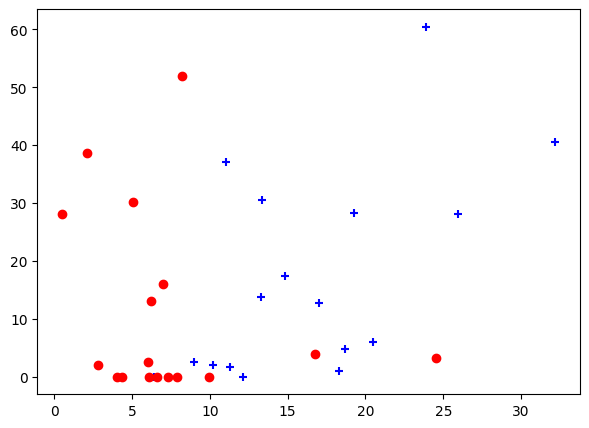

---
seed_number:  61


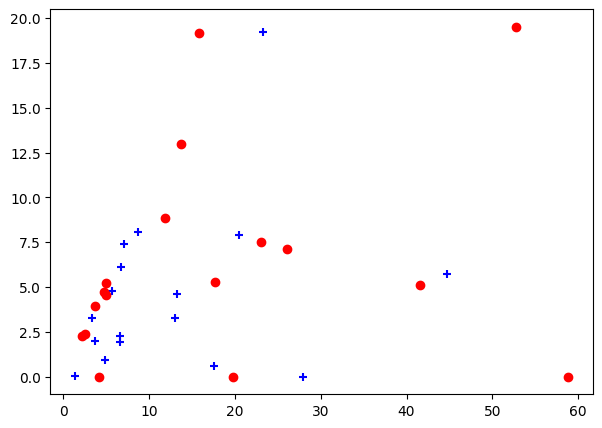

---
seed_number:  62


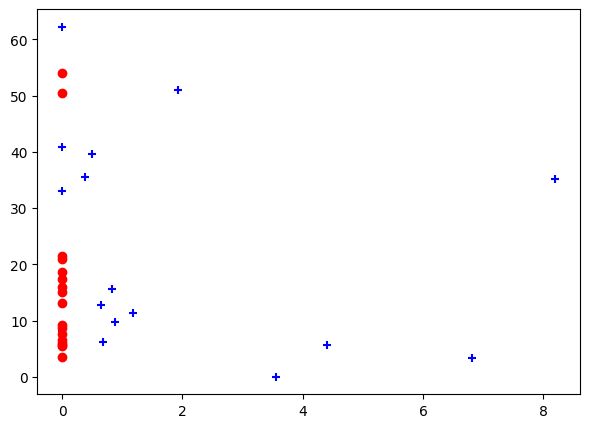

---
seed_number:  63


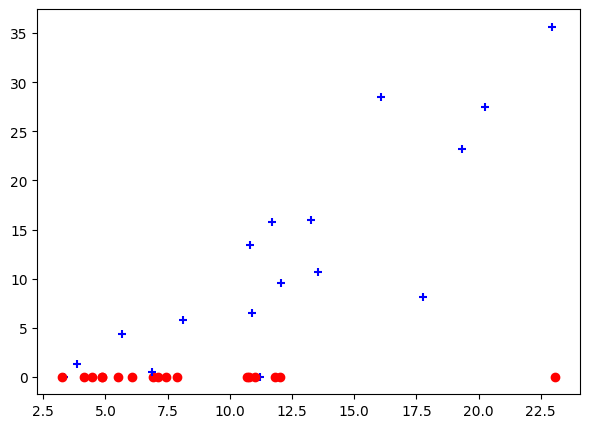

---
seed_number:  64


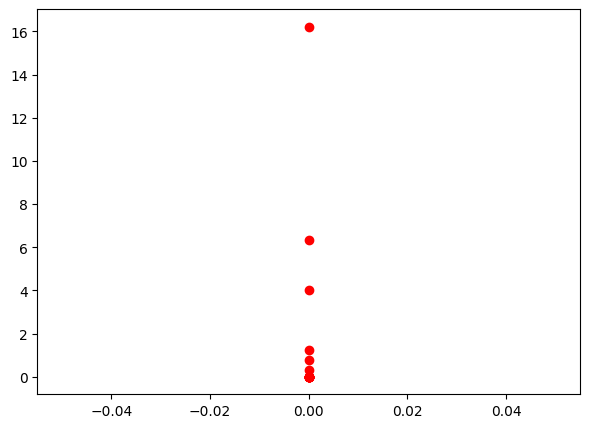

---
seed_number:  65


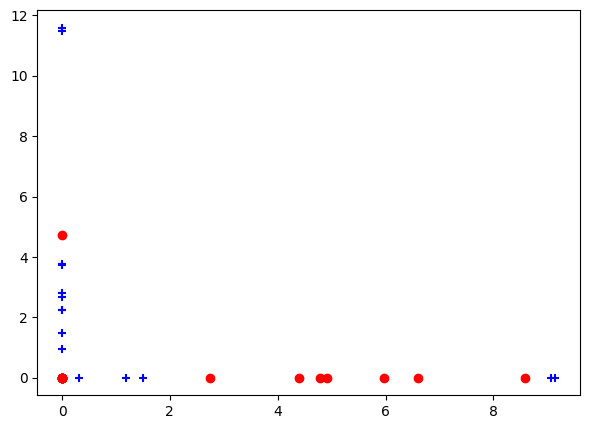

---
seed_number:  66


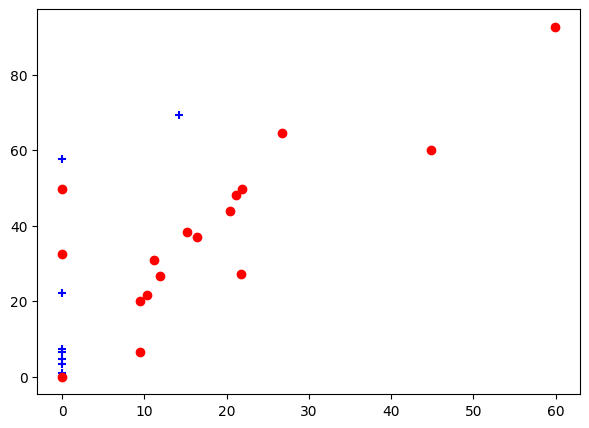

---
seed_number:  67


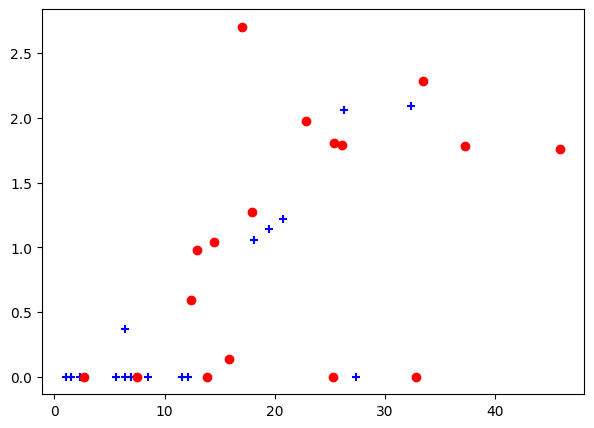

---
seed_number:  68


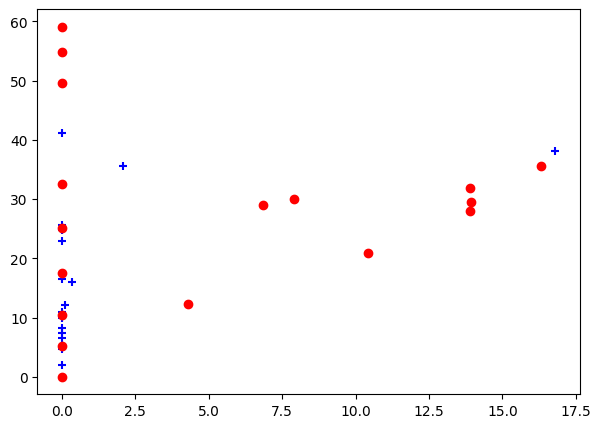

---
seed_number:  69


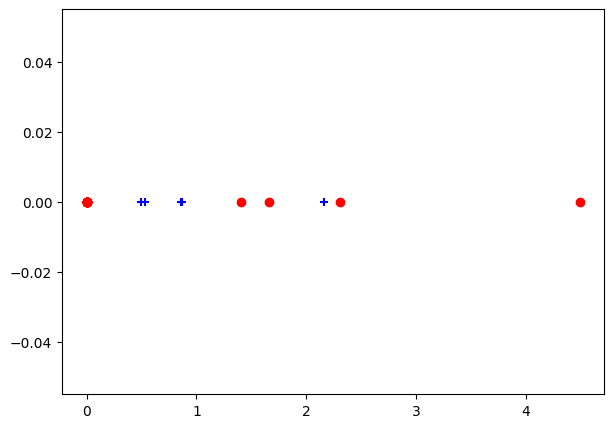

---
seed_number:  70


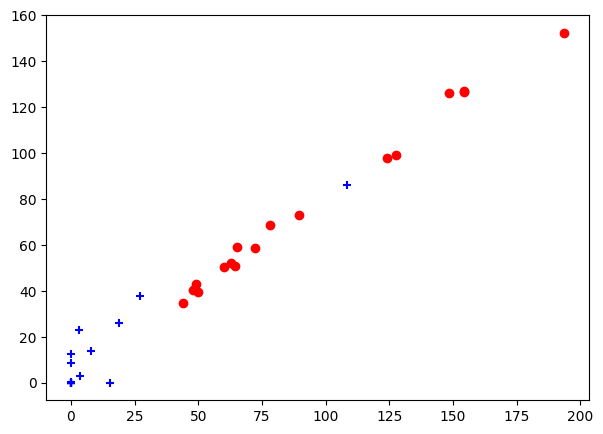

---
seed_number:  71


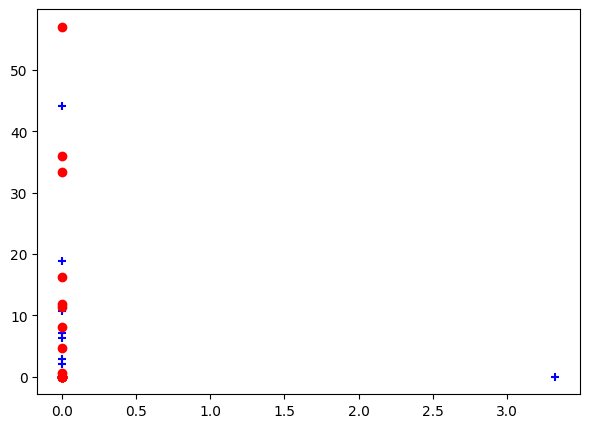

---
seed_number:  72


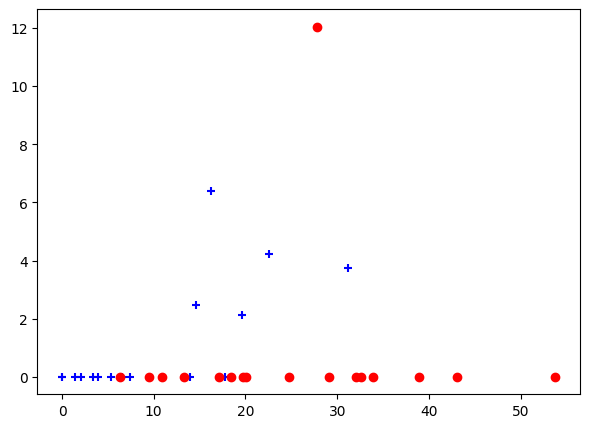

---
seed_number:  73


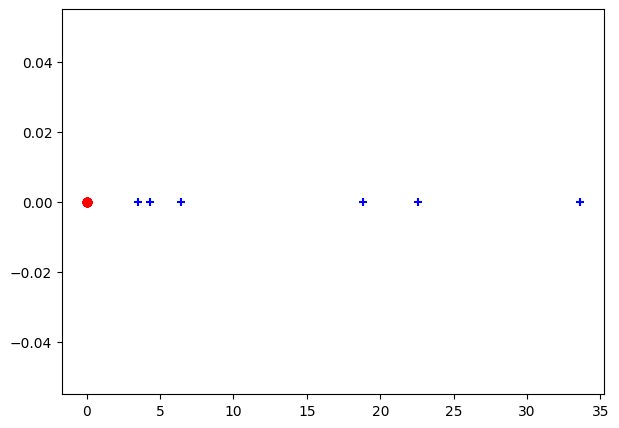

---
seed_number:  74


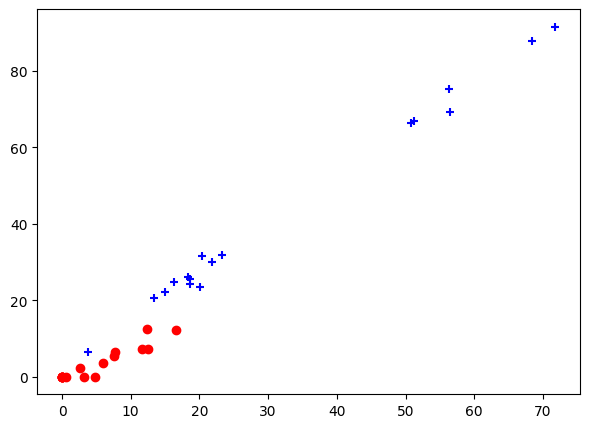

---
seed_number:  75


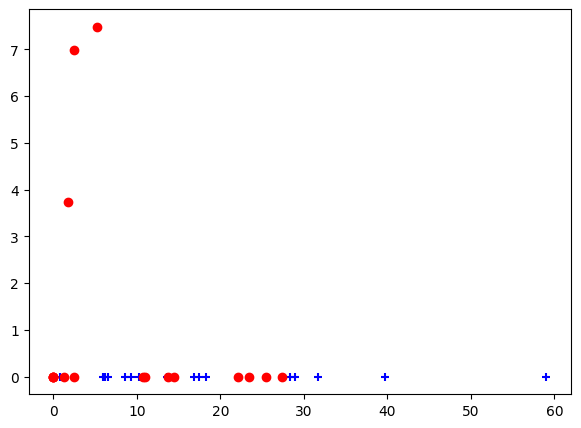

---
seed_number:  76


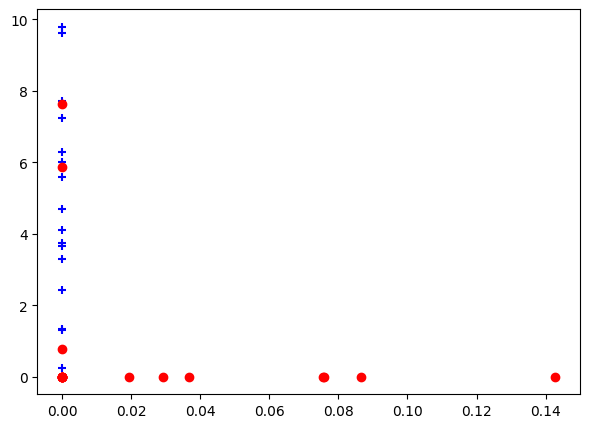

---
seed_number:  77


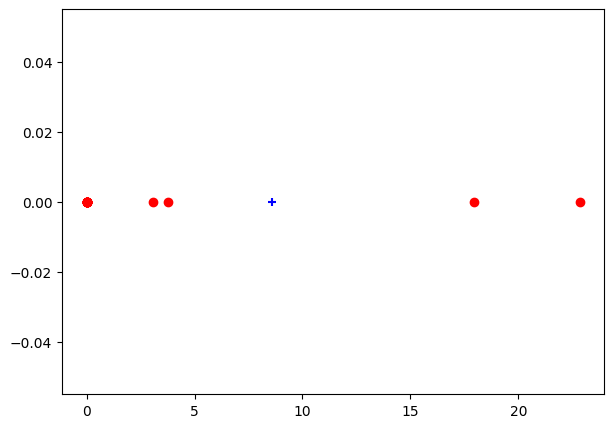

---
seed_number:  78


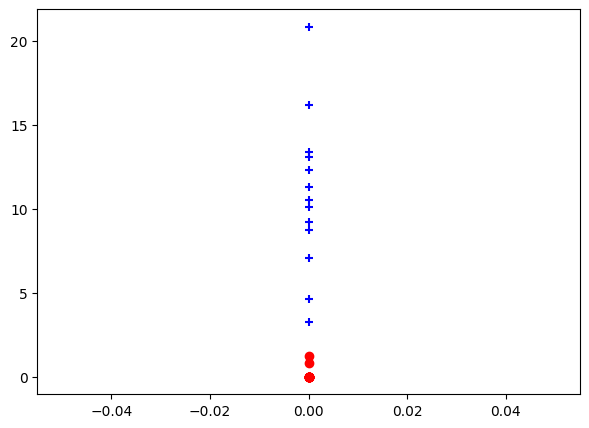

---
seed_number:  79


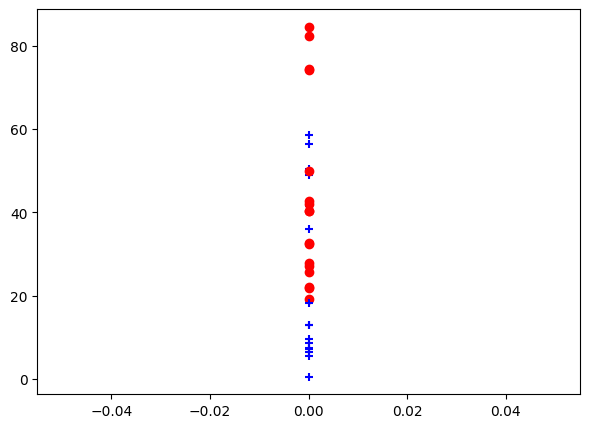

---
seed_number:  80


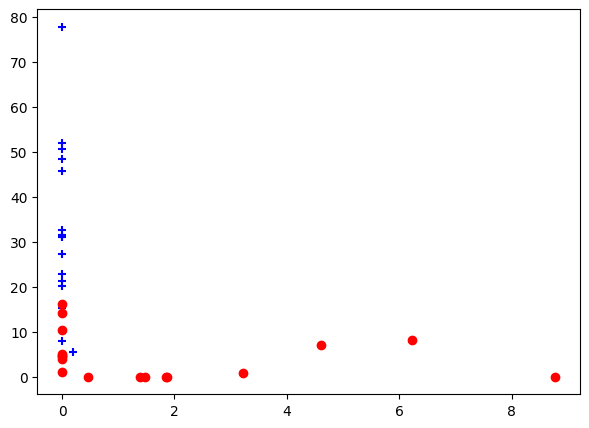

---
seed_number:  81


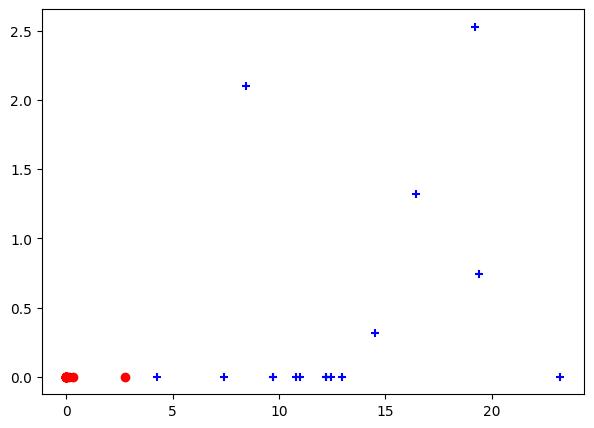

---
seed_number:  82


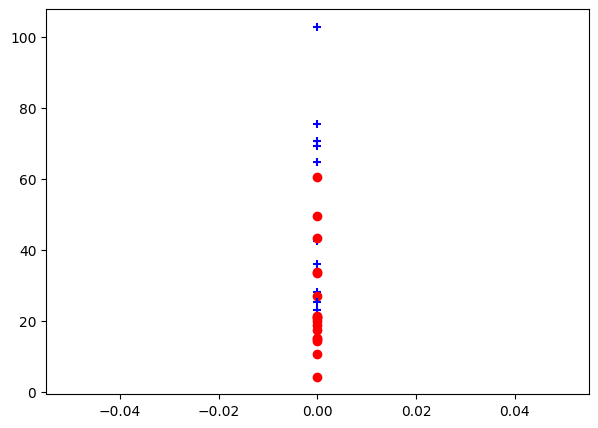

---
seed_number:  83


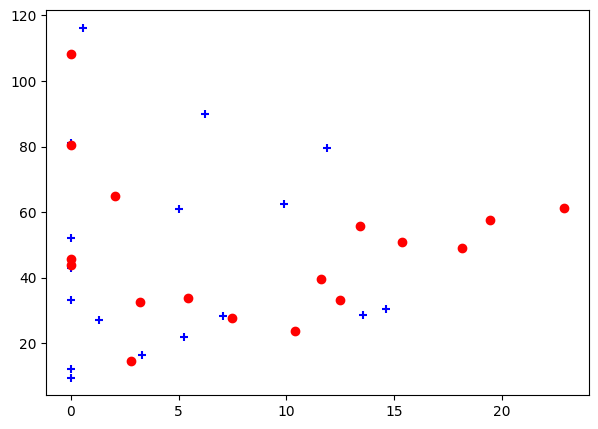

---
seed_number:  84


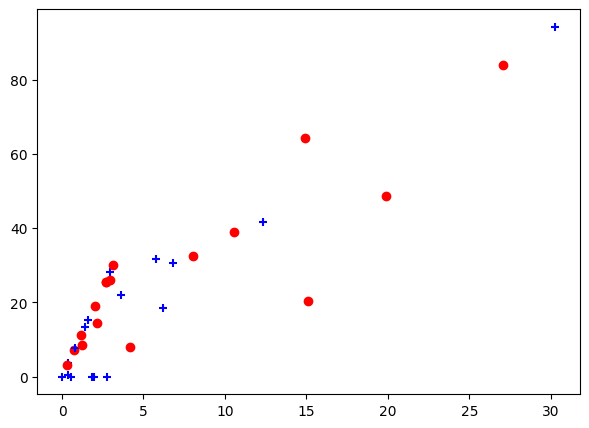

---
seed_number:  85


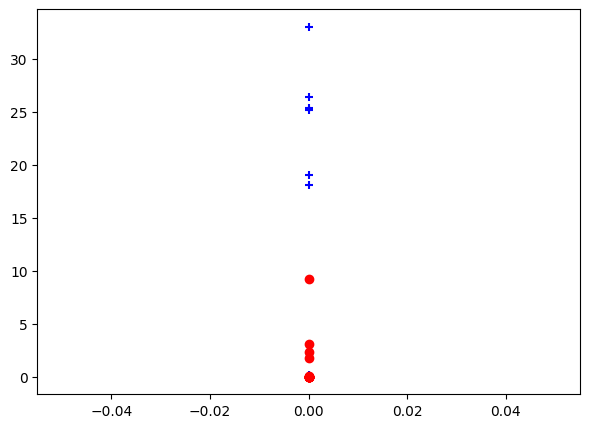

---
seed_number:  86


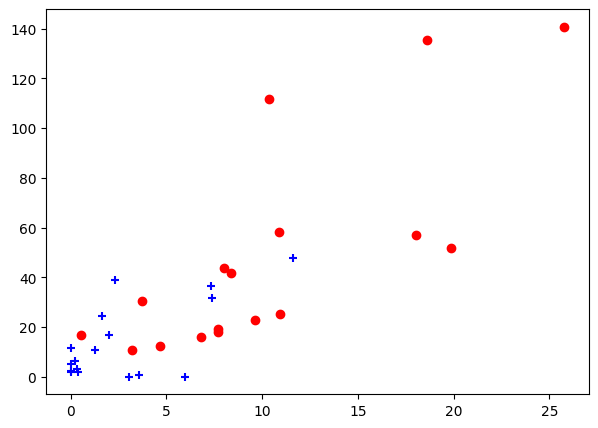

---
seed_number:  87


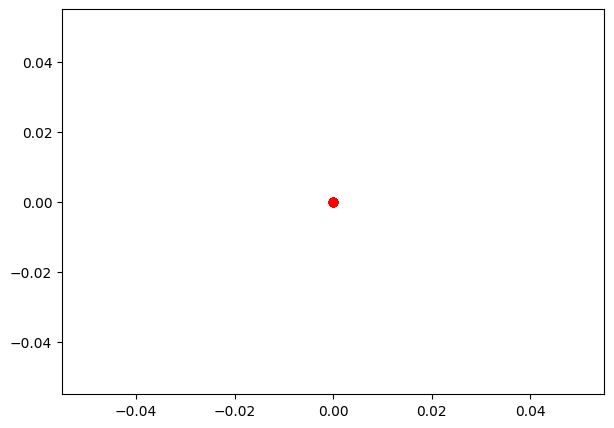

---
seed_number:  88


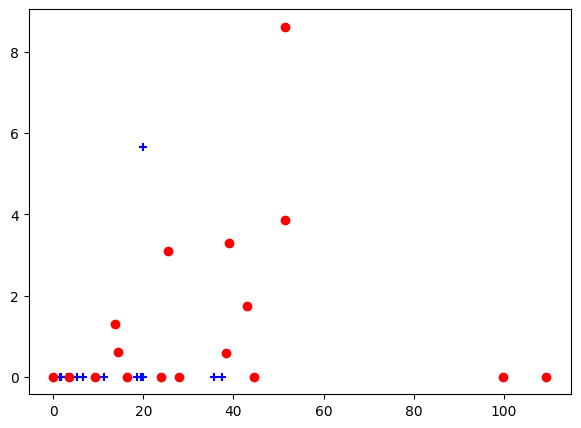

---
seed_number:  89


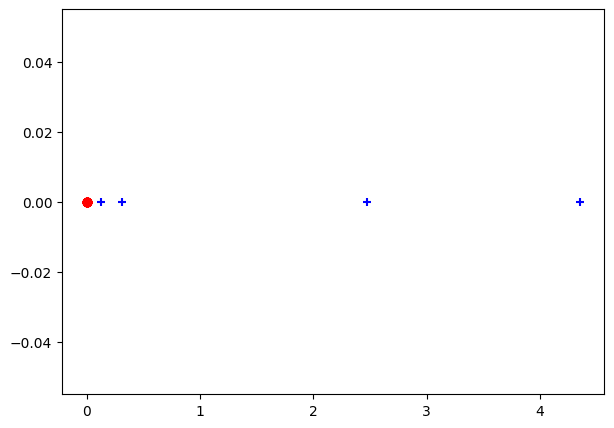

In [47]:
for seed_number in range(1, 90):
    np.random.seed(seed_number)
    print("---")
    print("seed_number: ", seed_number)
    W1 = np.random.normal(loc = 0, scale = 1, size = (number_of_nodes, 4))
    W2 = np.random.normal(loc = 0, size = (W1.shape[1], 2))
    H_layer1 = gcn_normalized_layer(A_hat, D_hat, H, W1)
    H_layer2 = gcn_normalized_layer(A_hat, D_hat, H_layer1, W2)
    nodes_embeddings = {node: np.array(H_layer2)[node] for node in zkc.nodes()}
    display_after_embedding(nodes_embeddings, nodes_labels_binary)

---
seed_number:  91


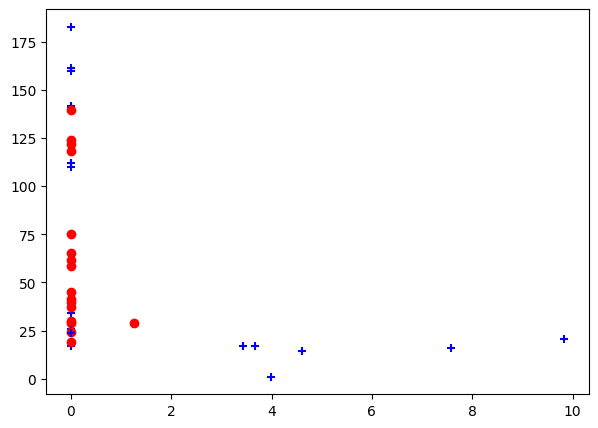

---
seed_number:  92


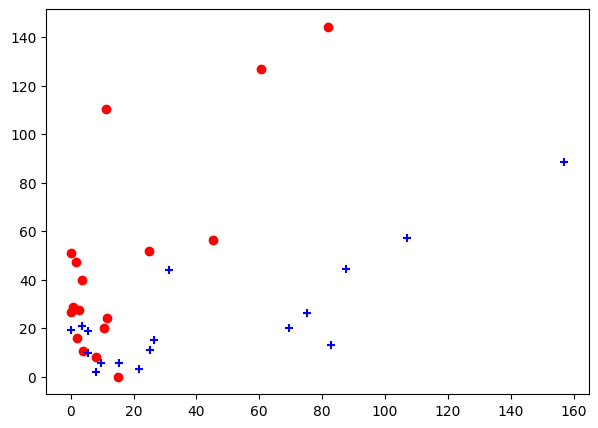

---
seed_number:  93


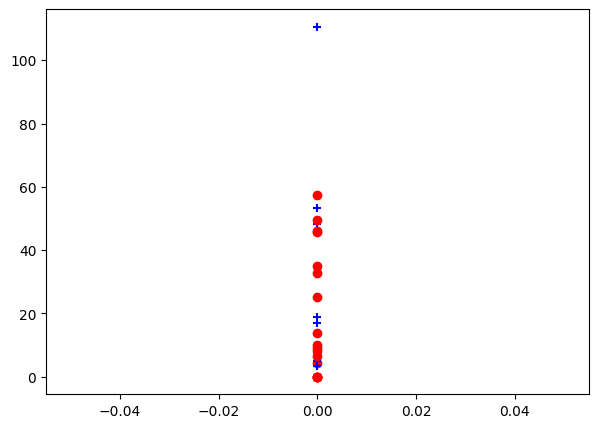

---
seed_number:  94


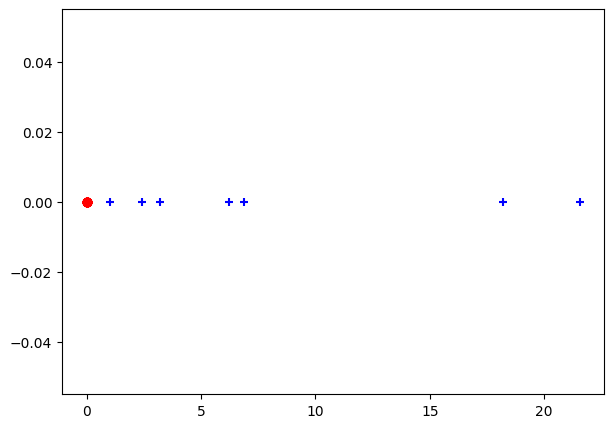

---
seed_number:  95


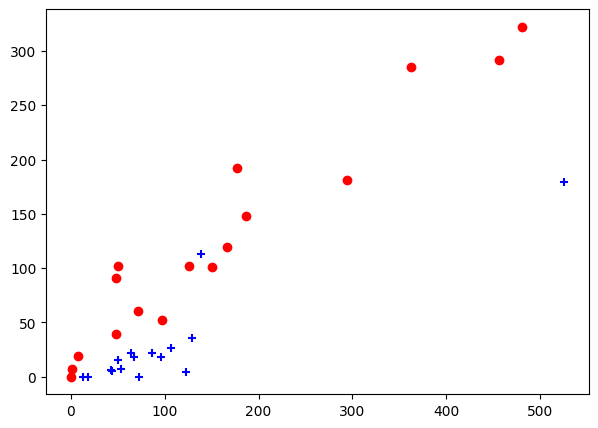

---
seed_number:  96


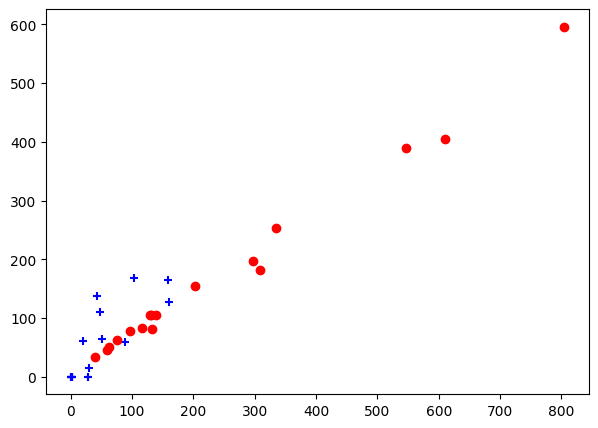

---
seed_number:  97


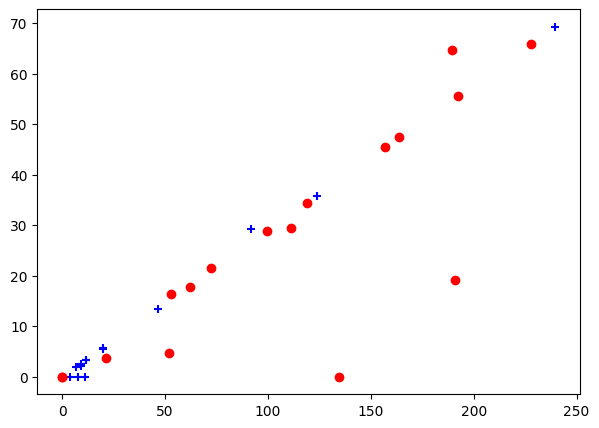

---
seed_number:  98


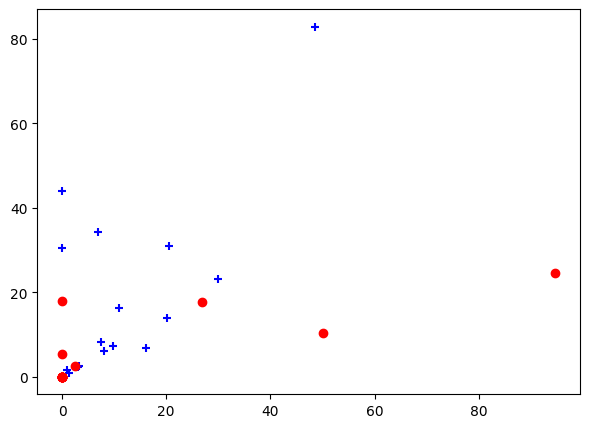

---
seed_number:  99


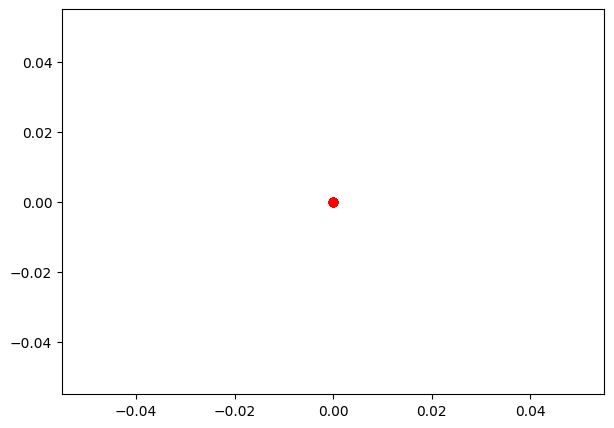

---
seed_number:  100


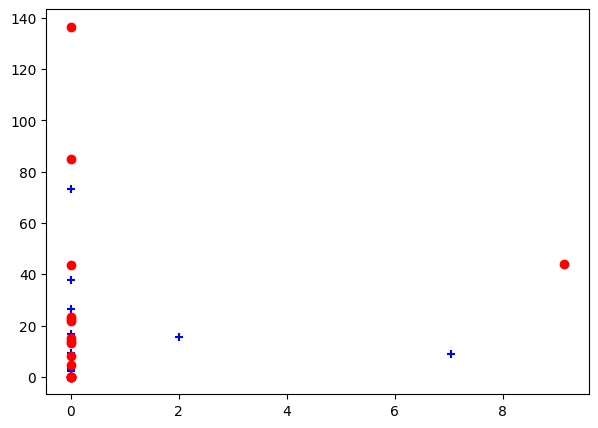

---
seed_number:  101


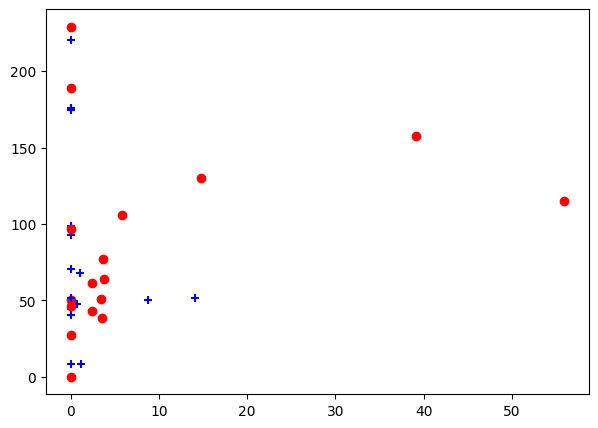

---
seed_number:  102


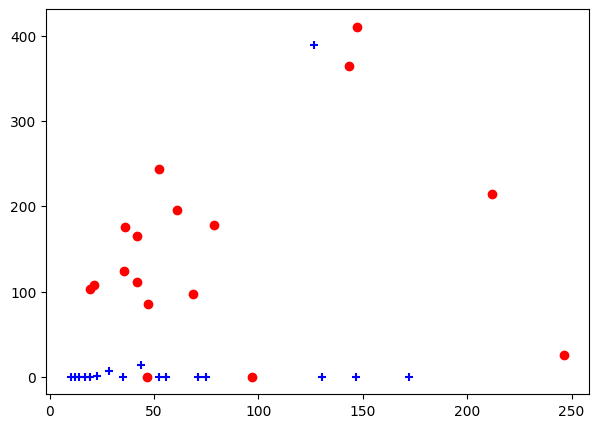

---
seed_number:  103


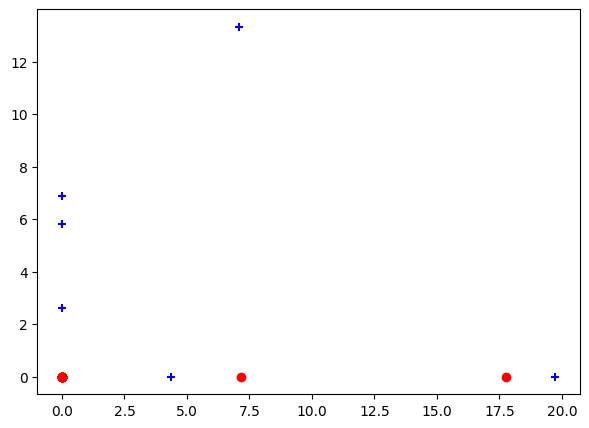

---
seed_number:  104


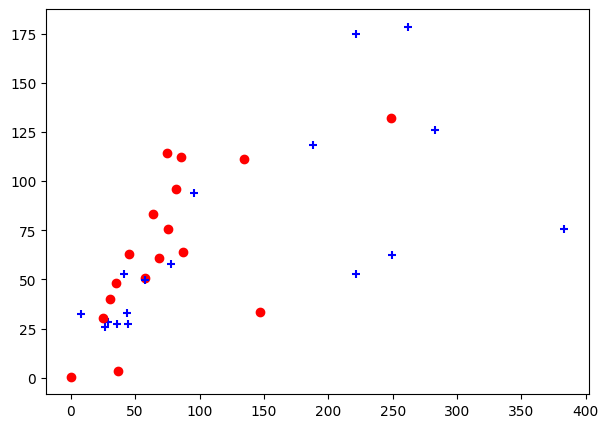

---
seed_number:  105


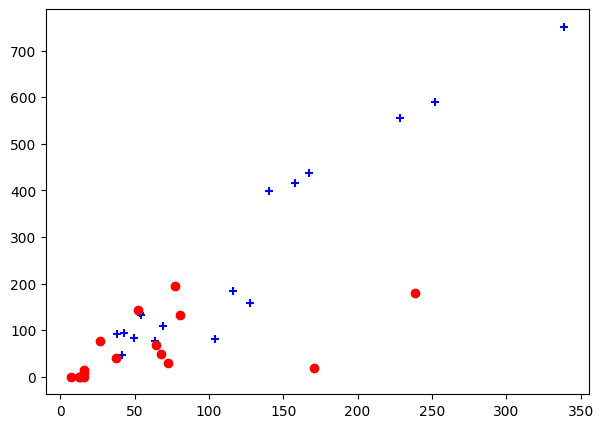

---
seed_number:  106


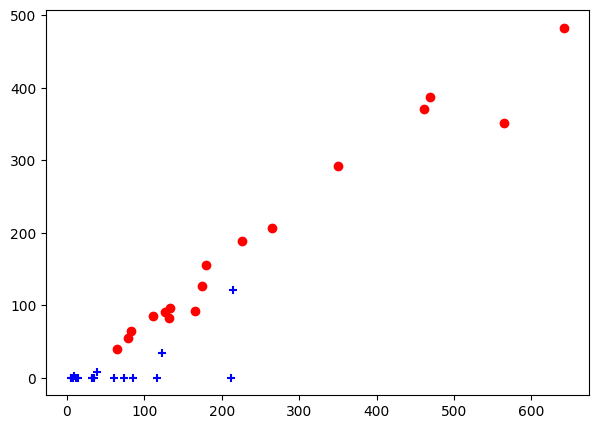

---
seed_number:  107


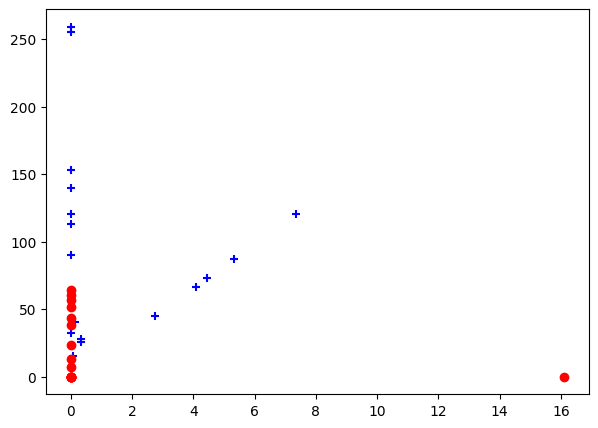

---
seed_number:  108


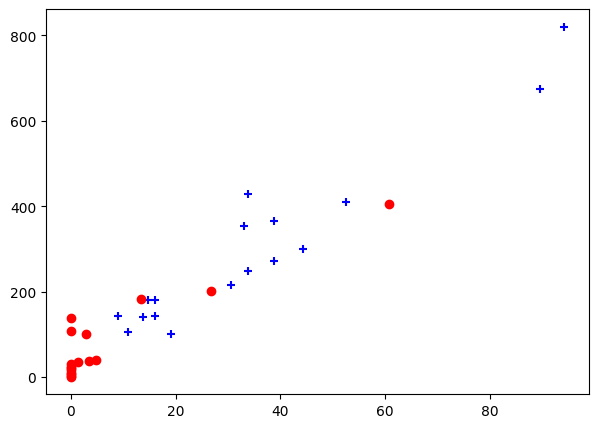

---
seed_number:  109


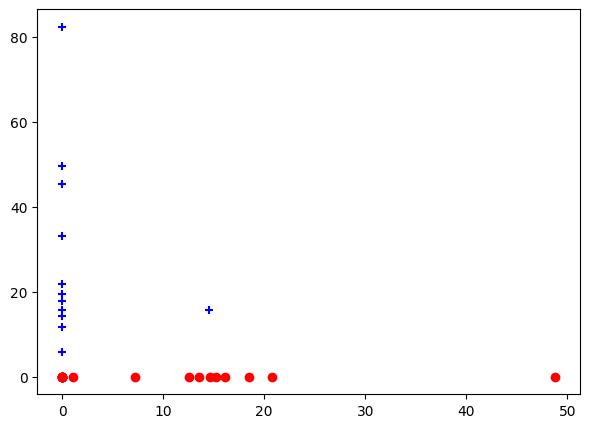

---
seed_number:  110


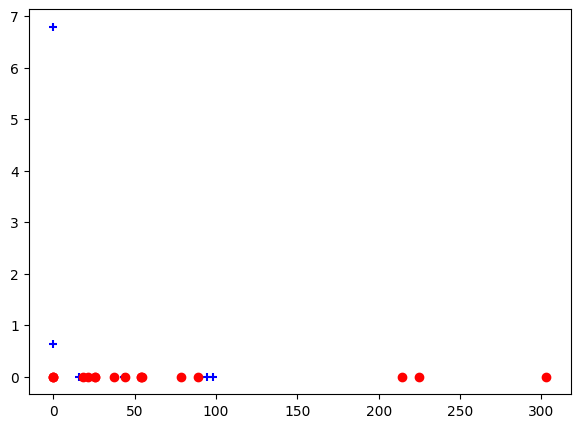

---
seed_number:  111


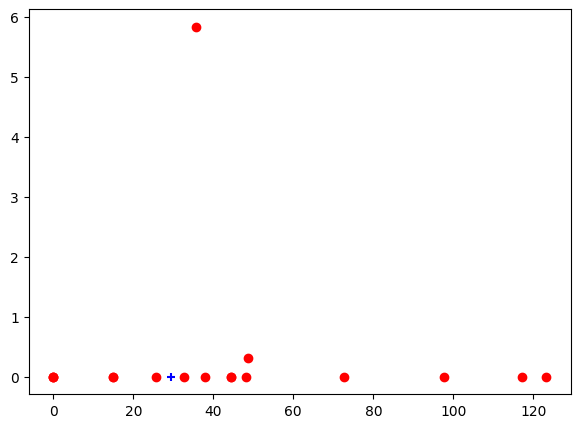

---
seed_number:  112


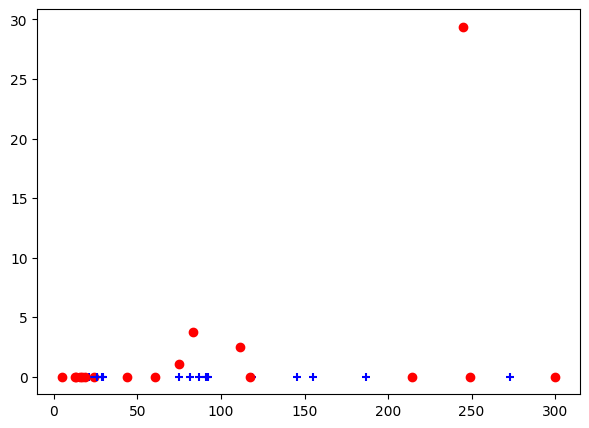

---
seed_number:  113


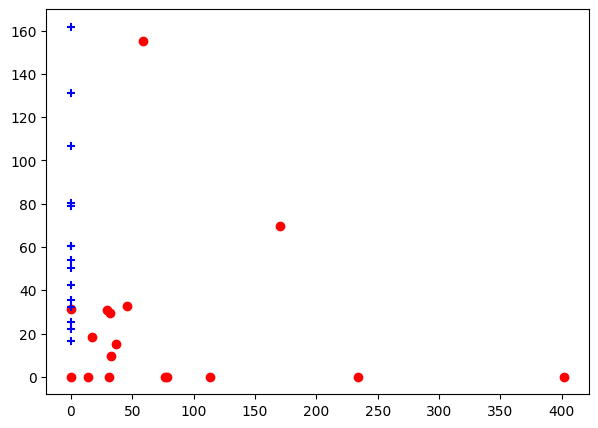

---
seed_number:  114


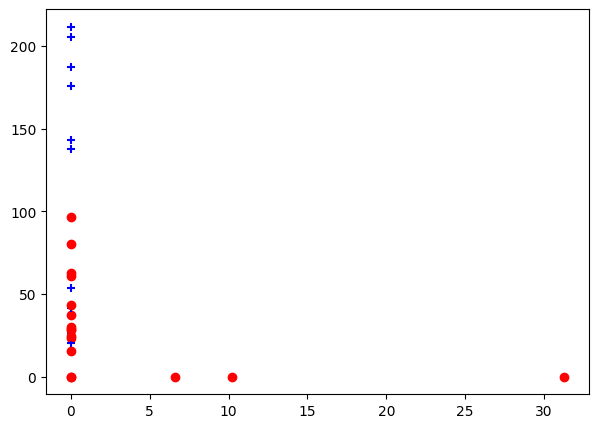

---
seed_number:  115


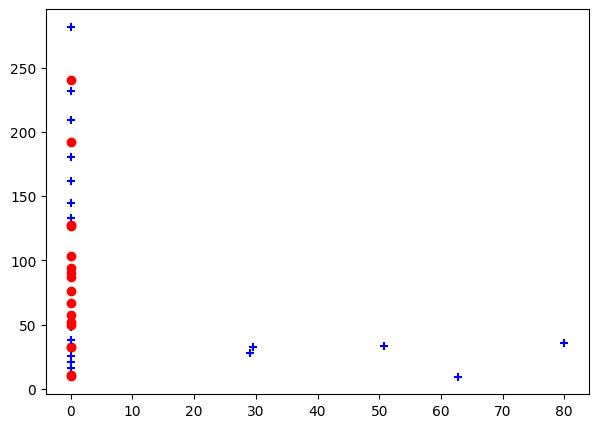

---
seed_number:  116


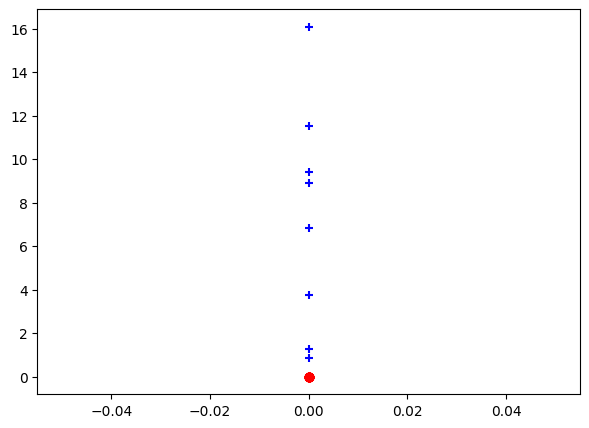

---
seed_number:  117


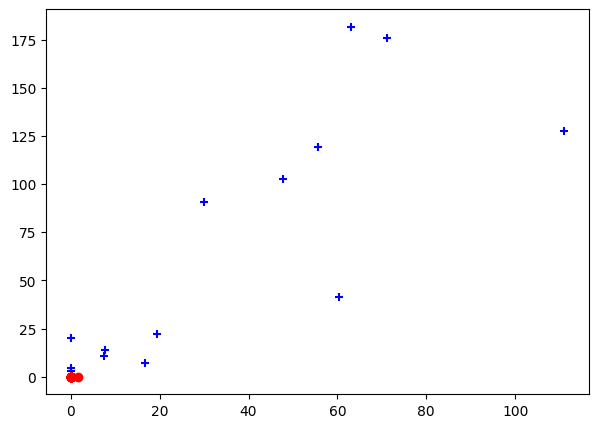

---
seed_number:  118


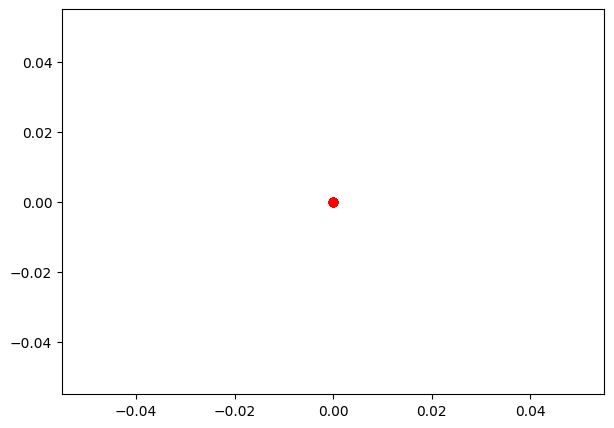

---
seed_number:  119


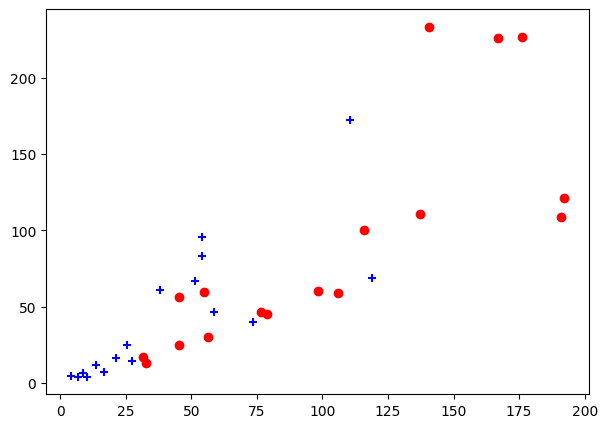

---
seed_number:  120


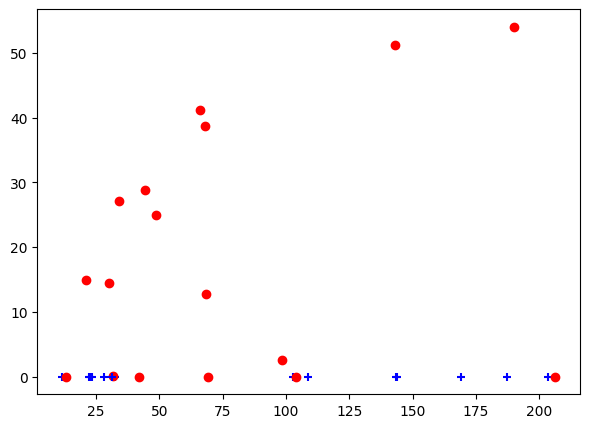

---
seed_number:  121


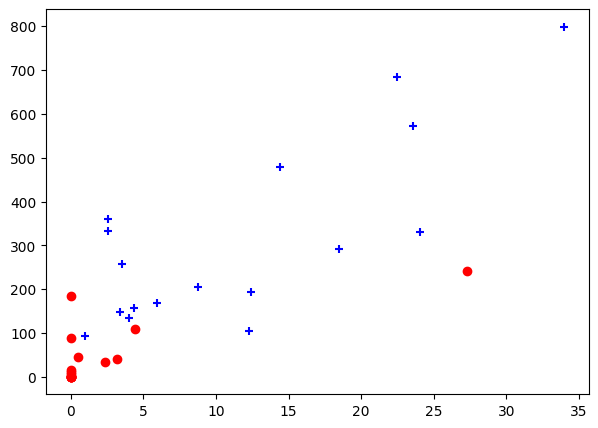

---
seed_number:  122


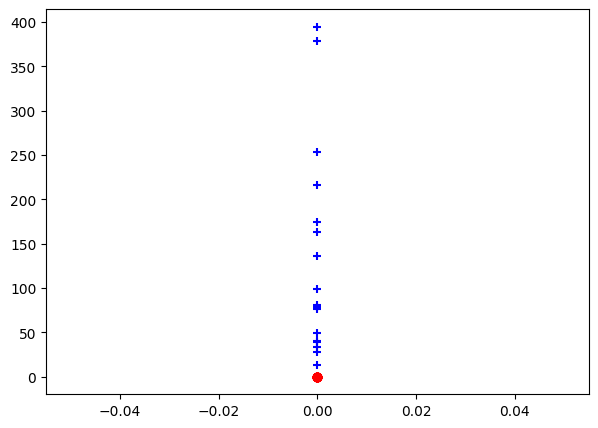

---
seed_number:  123


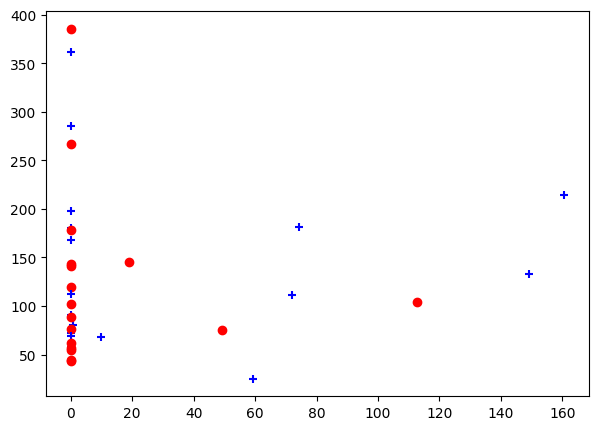

---
seed_number:  124


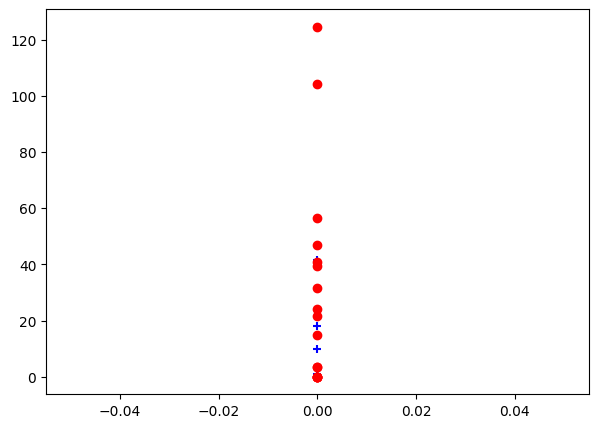

---
seed_number:  125


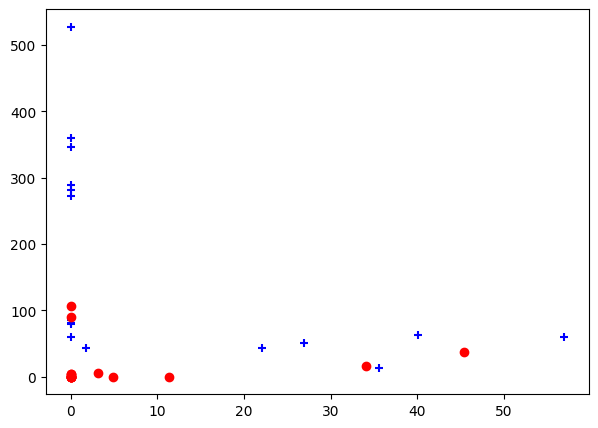

---
seed_number:  126


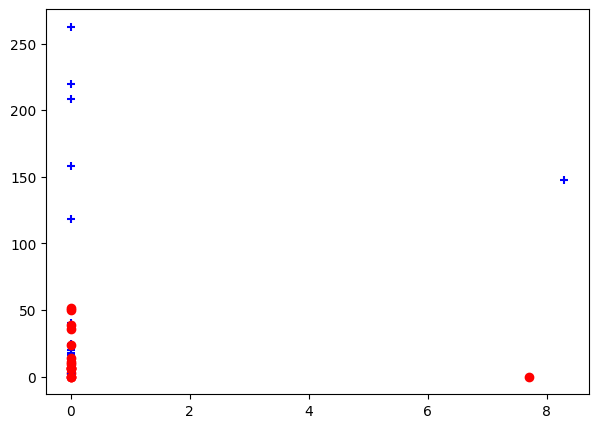

---
seed_number:  127


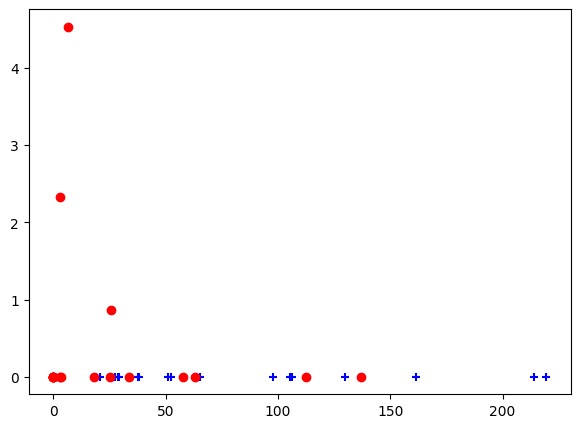

---
seed_number:  128


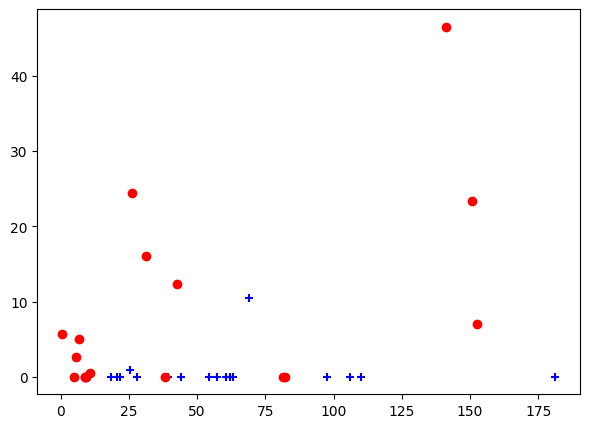

---
seed_number:  129


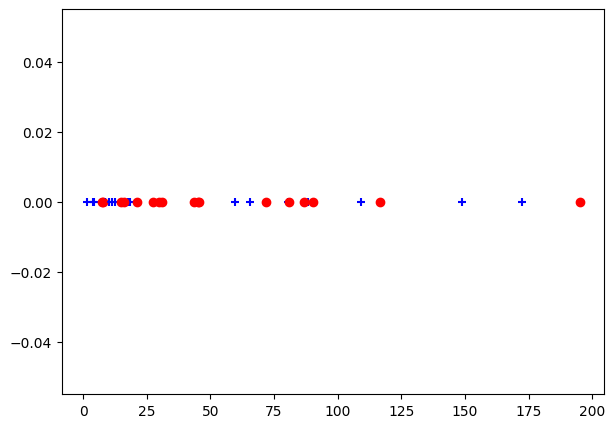

---
seed_number:  130


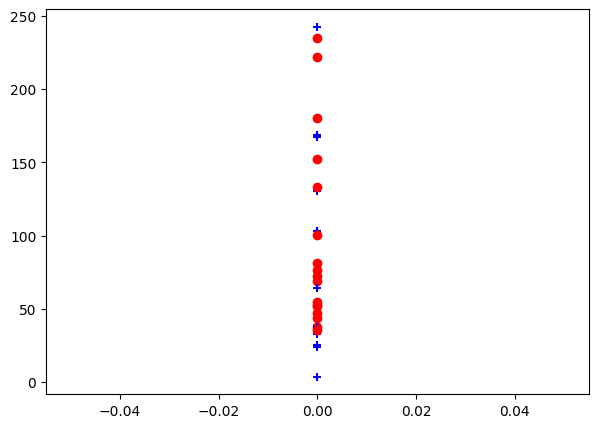

---
seed_number:  131


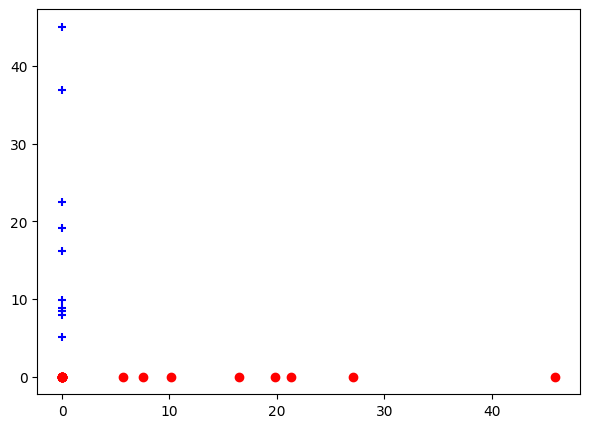

---
seed_number:  132


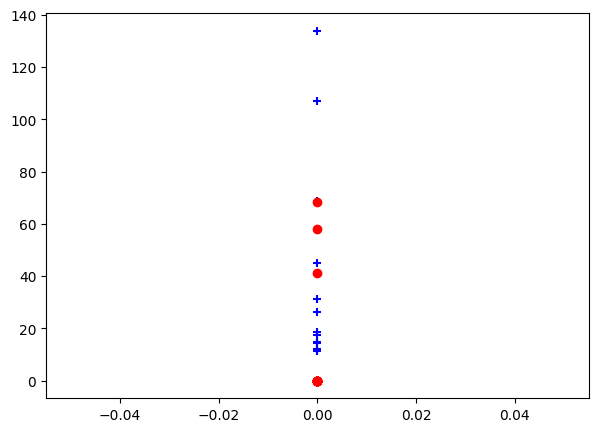

---
seed_number:  133


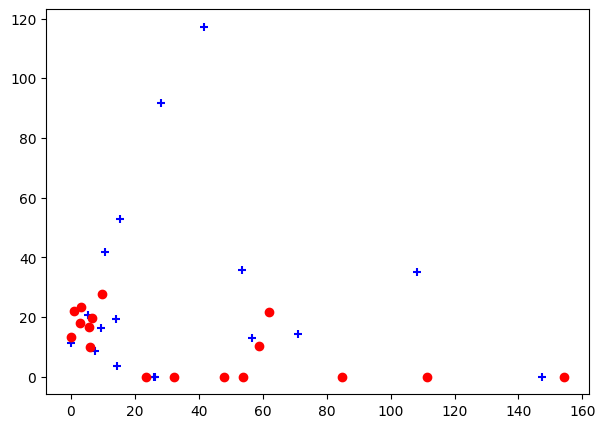

---
seed_number:  134


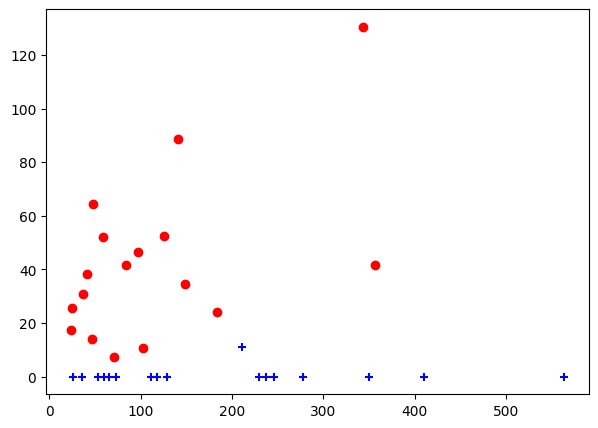

---
seed_number:  135


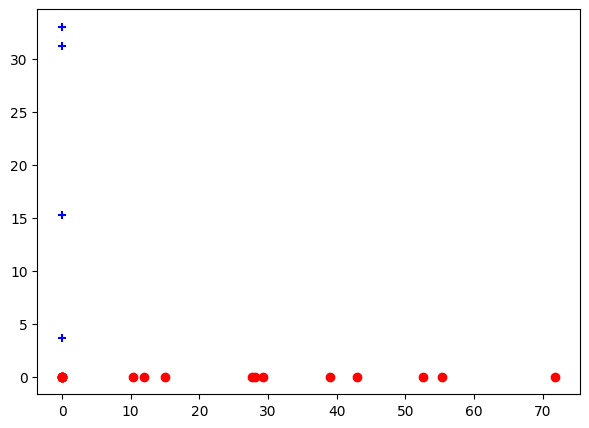

---
seed_number:  136


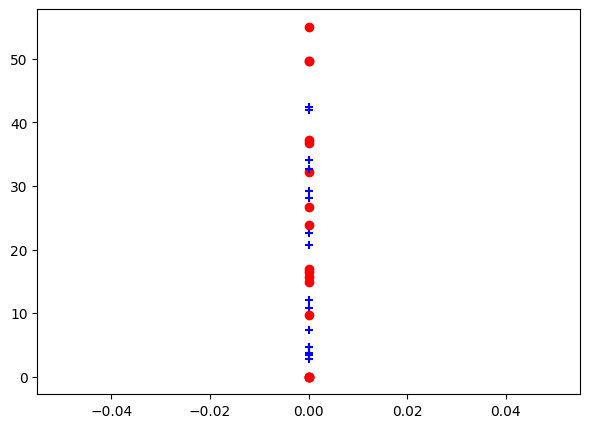

---
seed_number:  137


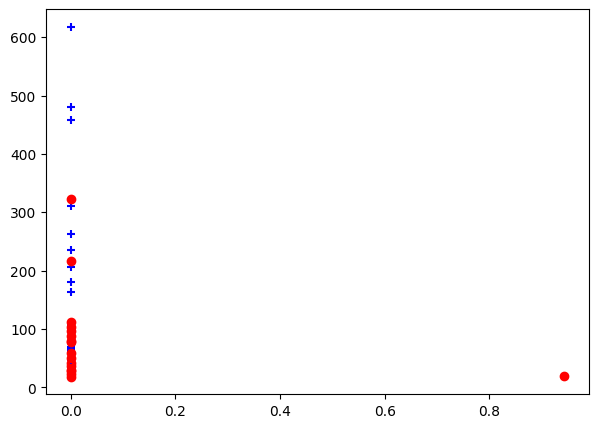

---
seed_number:  138


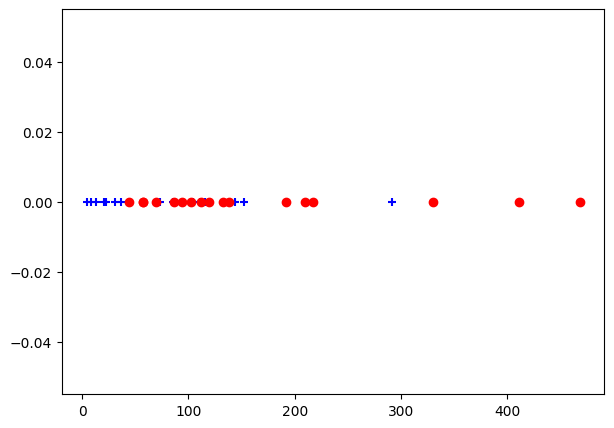

---
seed_number:  139


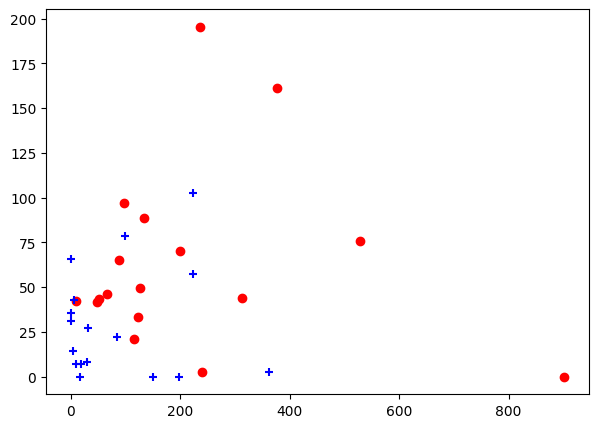

---
seed_number:  140


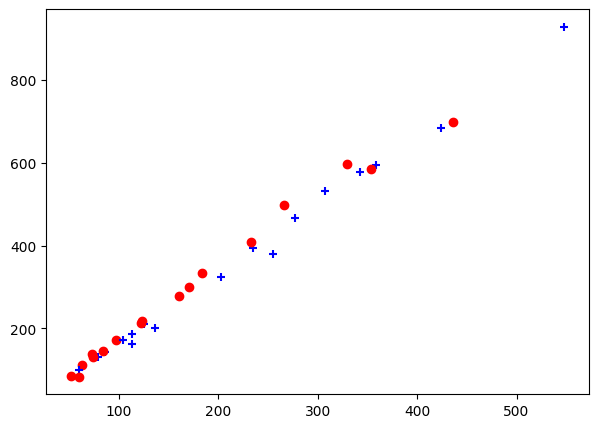

---
seed_number:  141


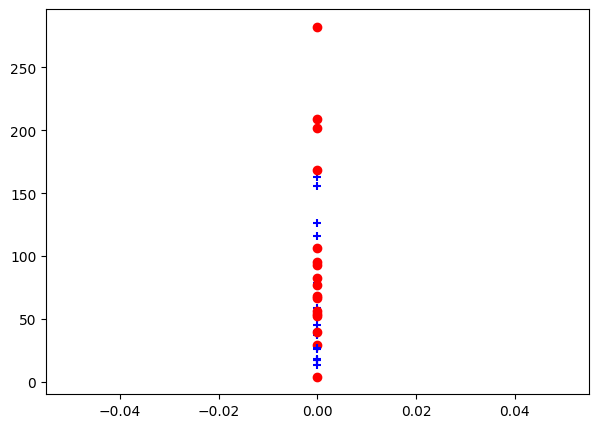

---
seed_number:  142


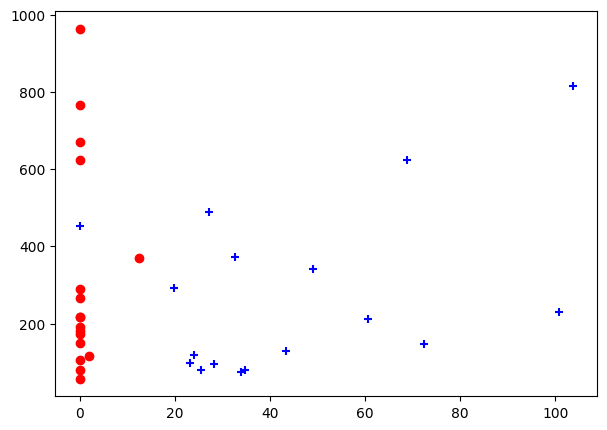

---
seed_number:  143


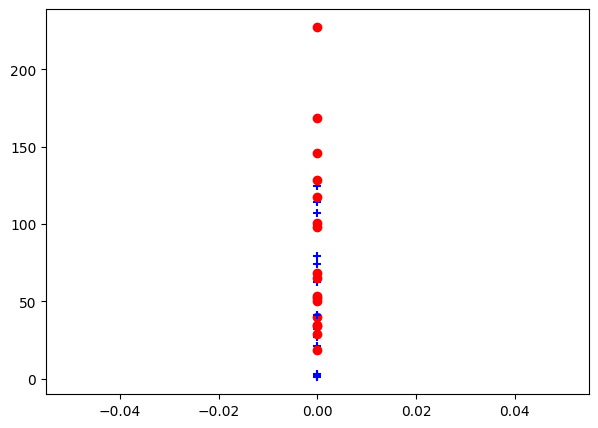

---
seed_number:  144


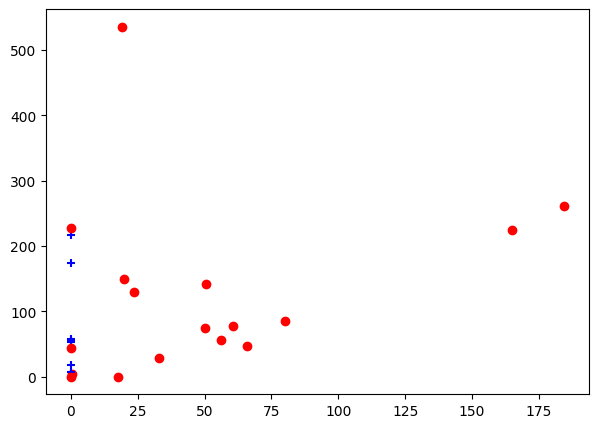

---
seed_number:  145


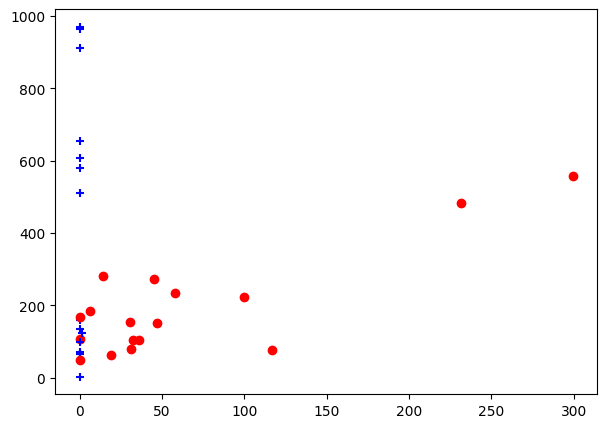

---
seed_number:  146


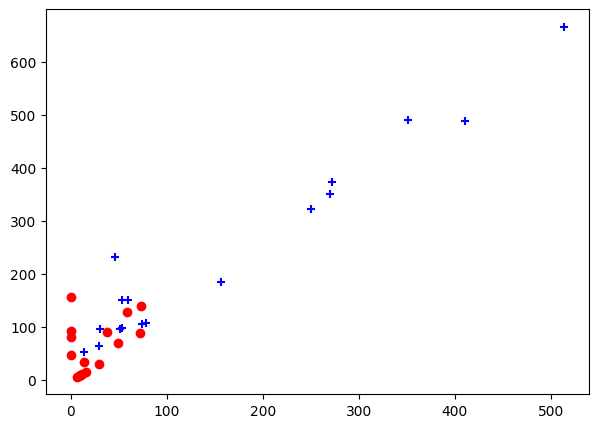

---
seed_number:  147


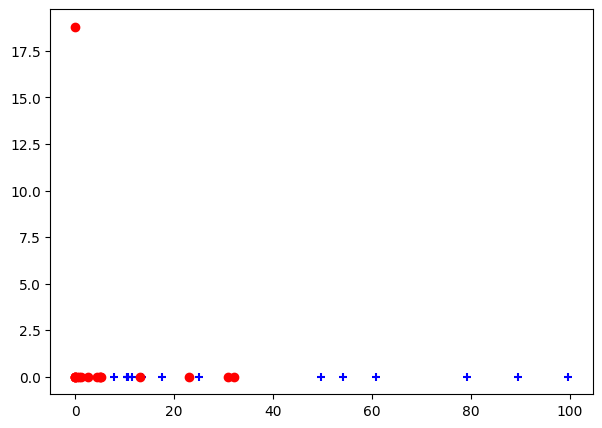

---
seed_number:  148


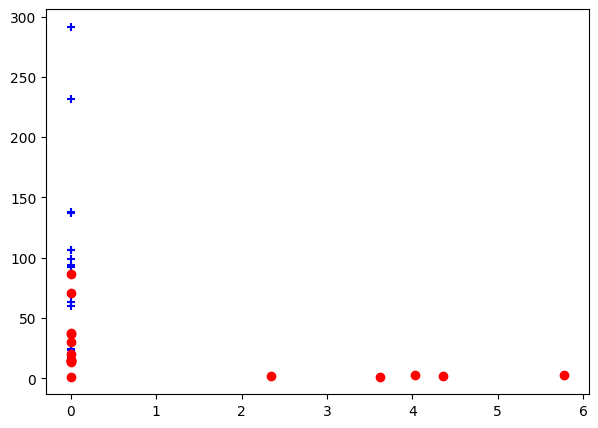

---
seed_number:  149


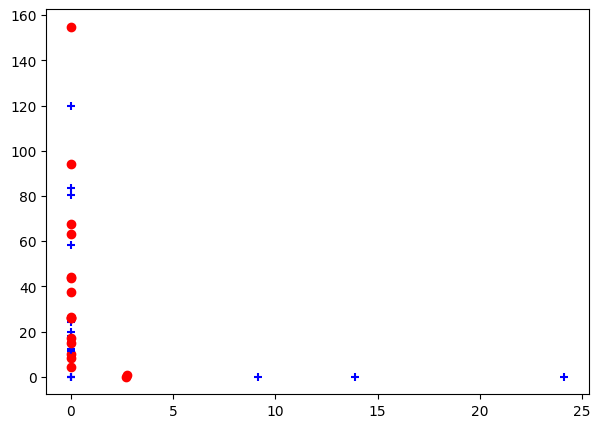

---
seed_number:  150


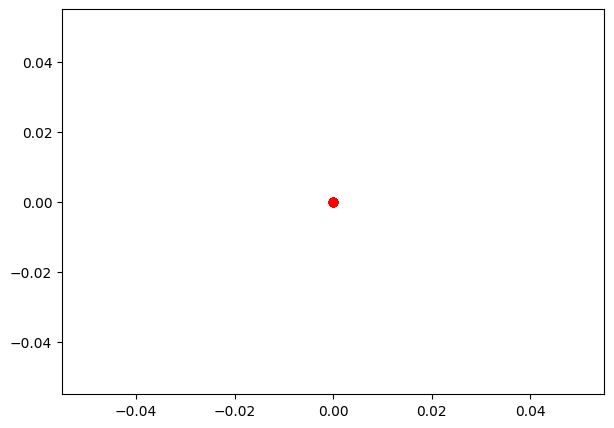

---
seed_number:  151


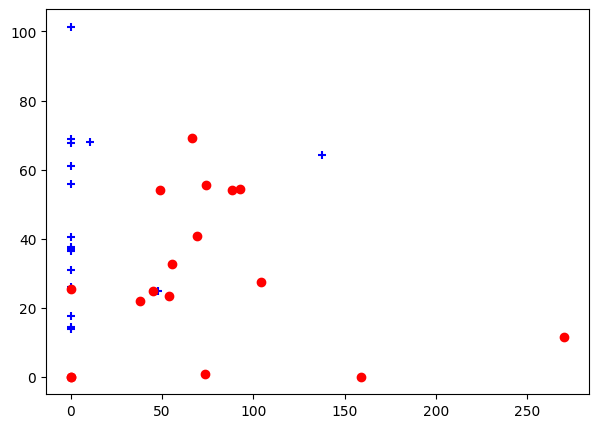

---
seed_number:  152


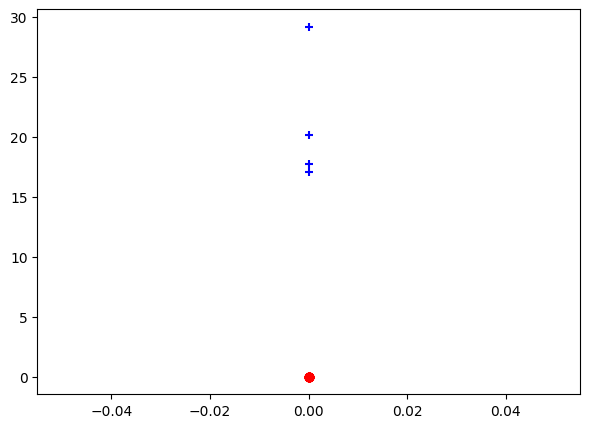

---
seed_number:  153


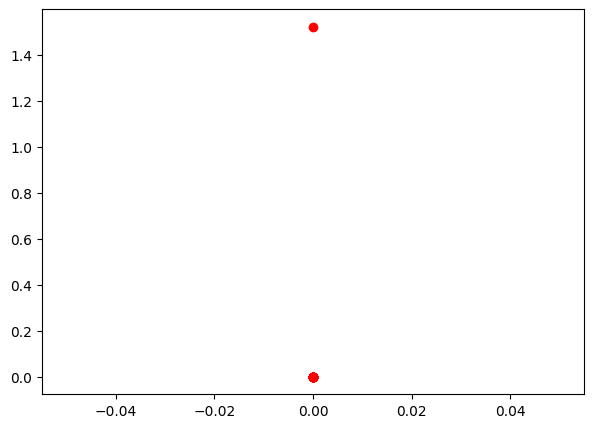

---
seed_number:  154


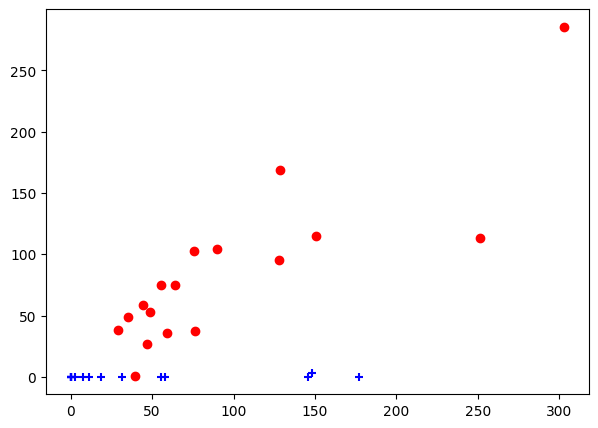

---
seed_number:  155


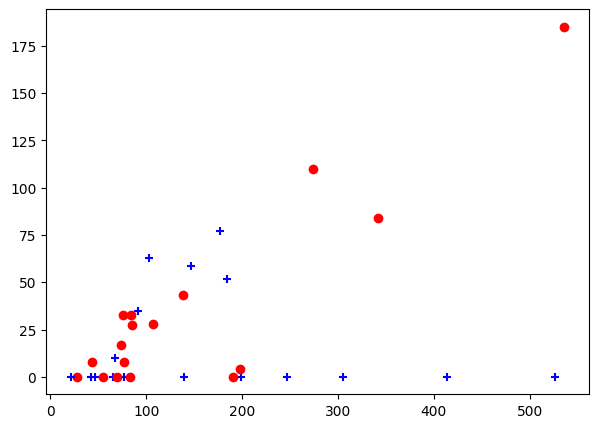

---
seed_number:  156


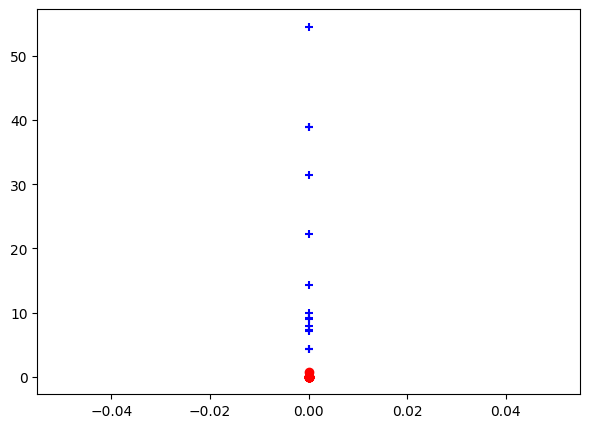

---
seed_number:  157


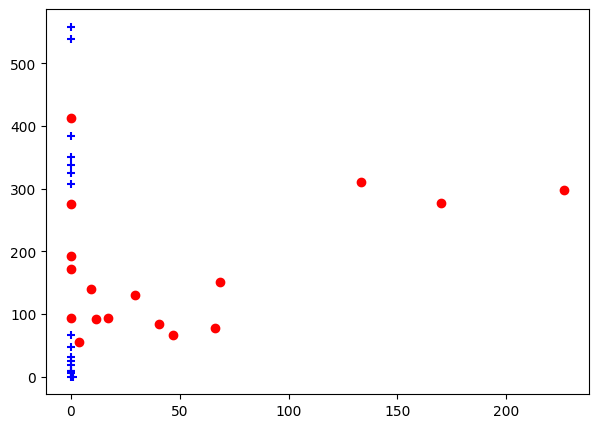

---
seed_number:  158


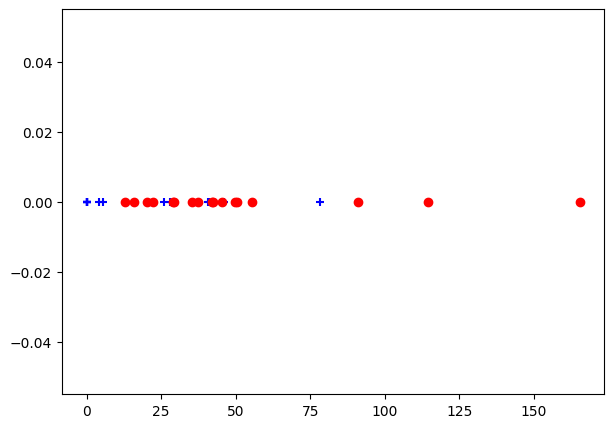

---
seed_number:  159


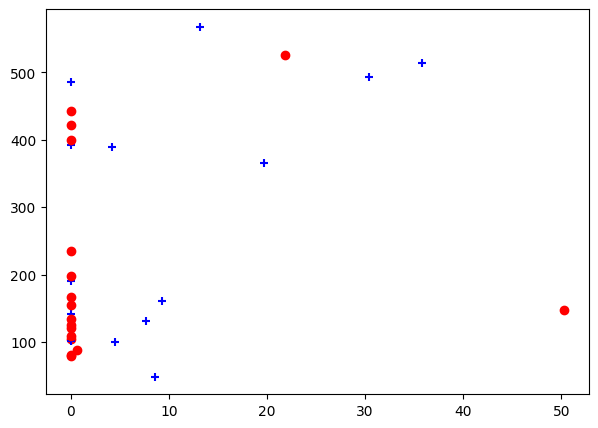

---
seed_number:  160


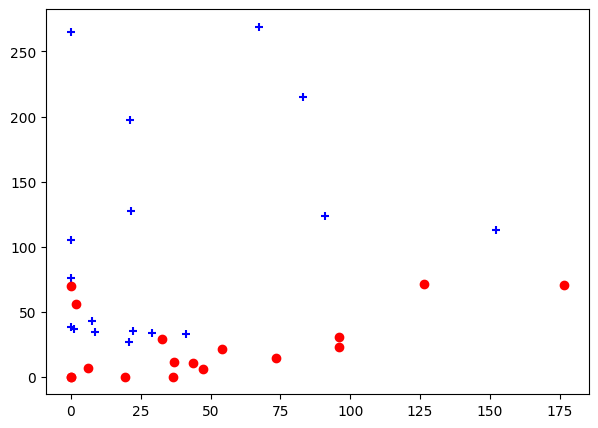

---
seed_number:  161


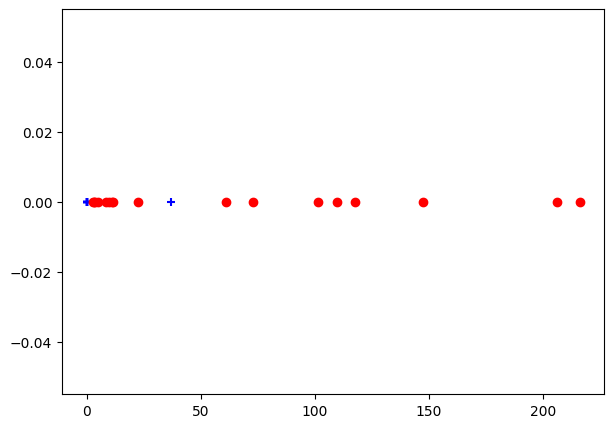

---
seed_number:  162


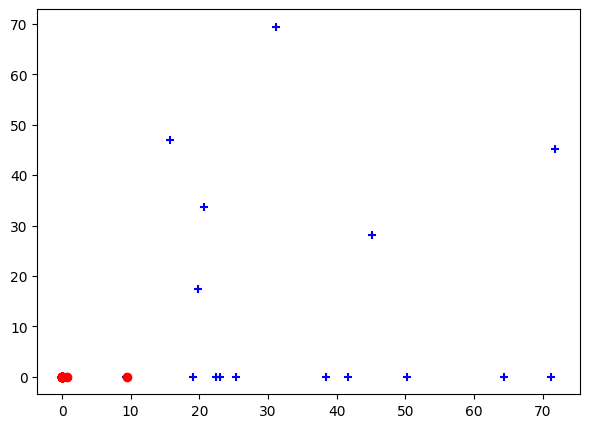

---
seed_number:  163


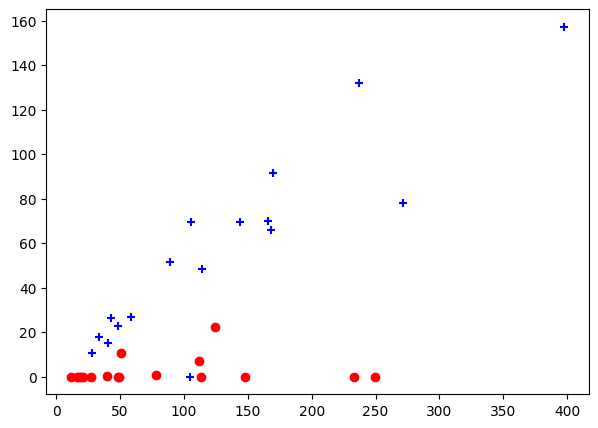

---
seed_number:  164


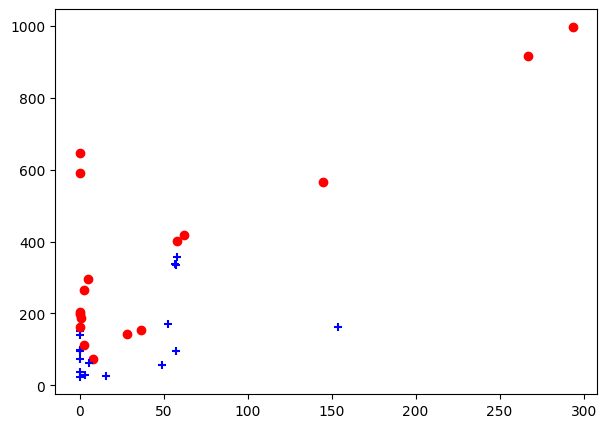

---
seed_number:  165


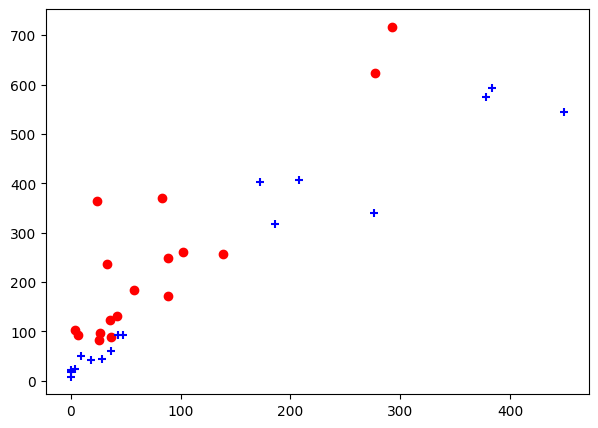

---
seed_number:  166


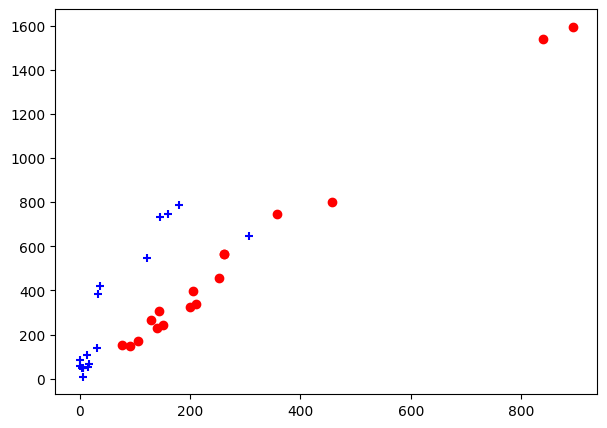

---
seed_number:  167


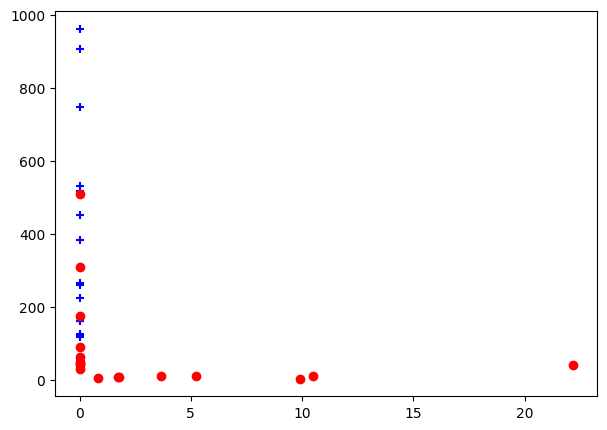

---
seed_number:  168


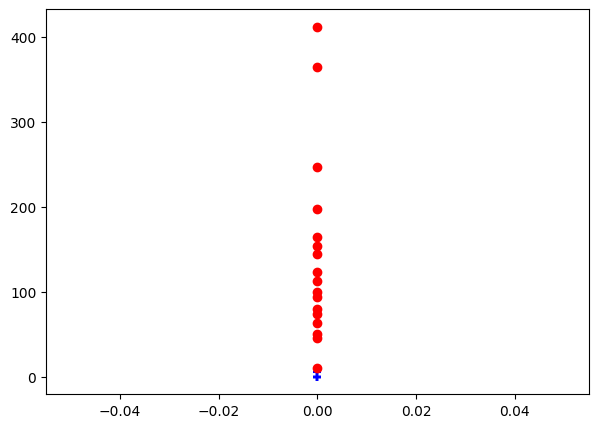

---
seed_number:  169


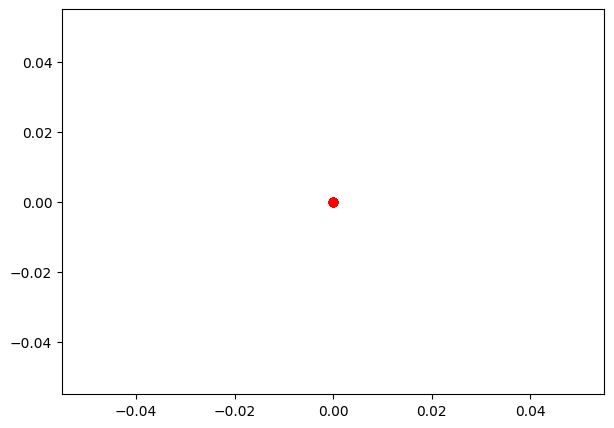

---
seed_number:  170


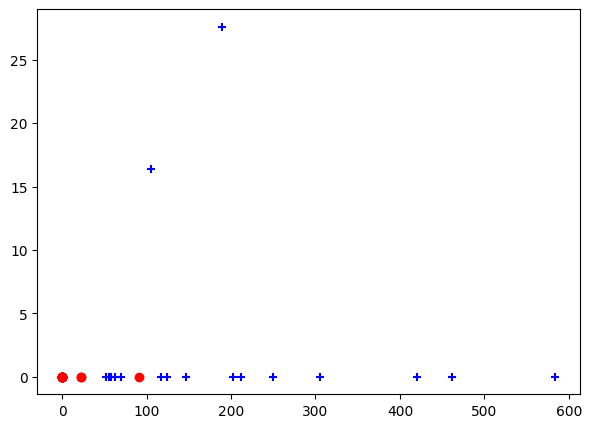

---
seed_number:  171


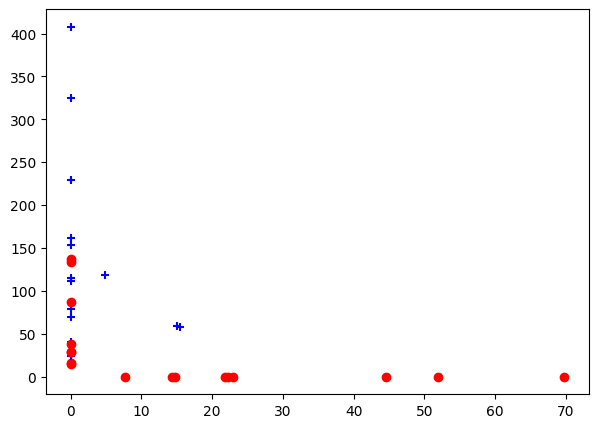

---
seed_number:  172


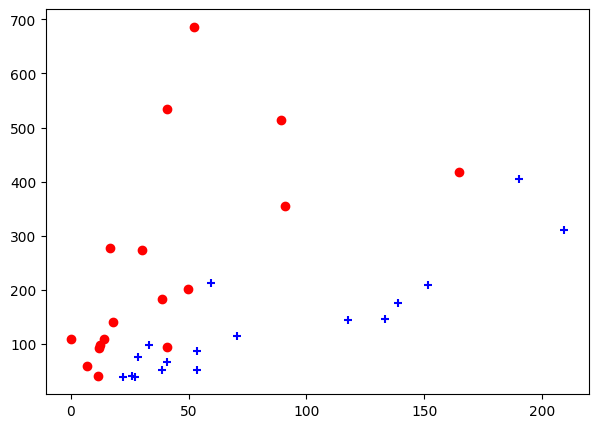

---
seed_number:  173


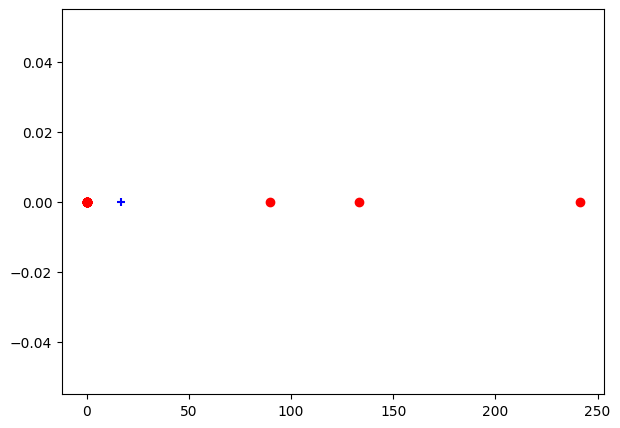

---
seed_number:  174


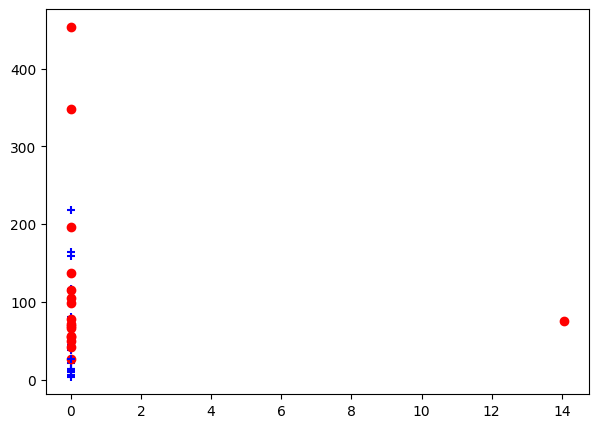

---
seed_number:  175


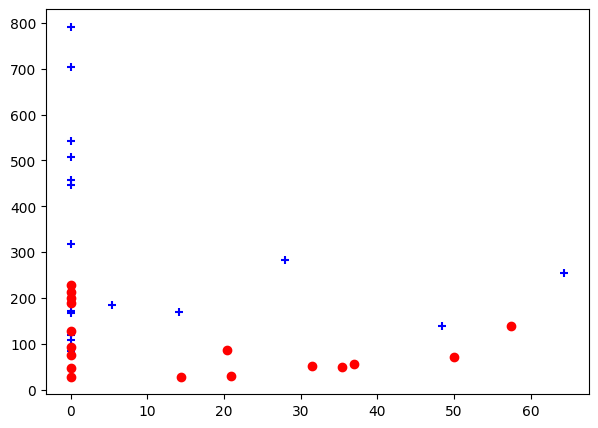

---
seed_number:  176


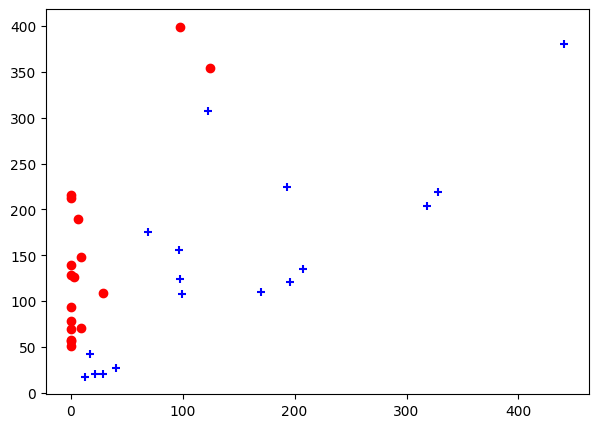

---
seed_number:  177


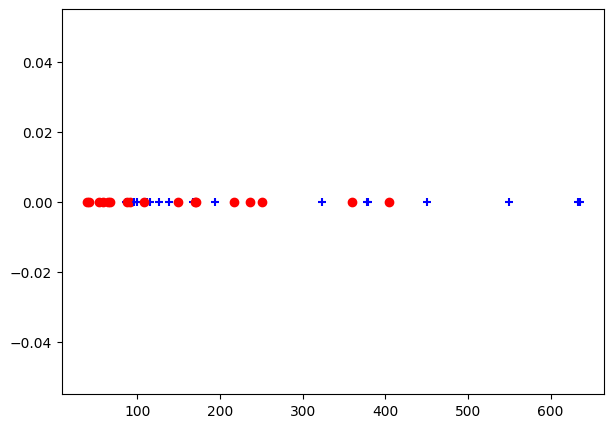

---
seed_number:  178


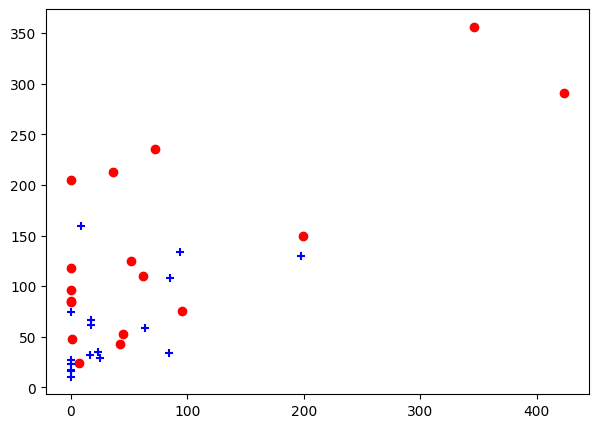

---
seed_number:  179


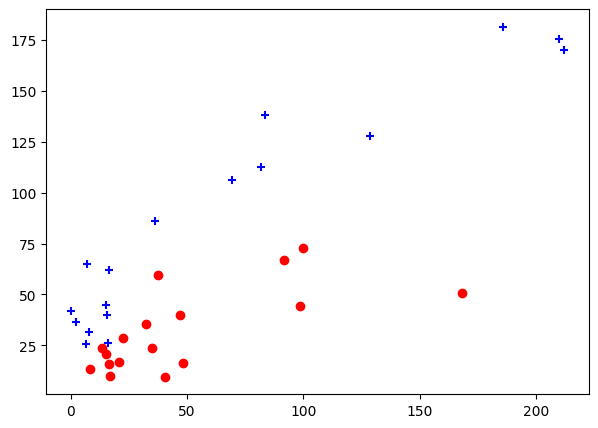

---
seed_number:  180


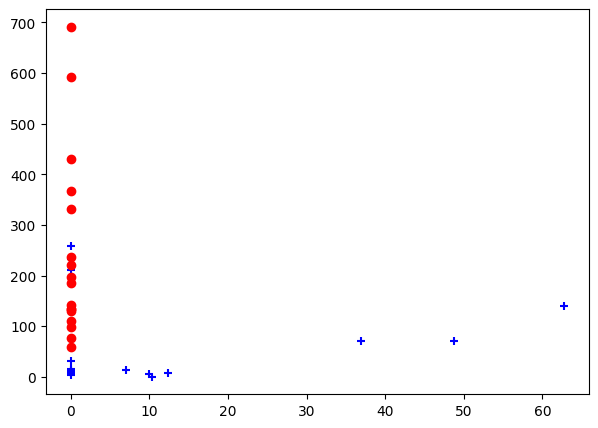

---
seed_number:  181


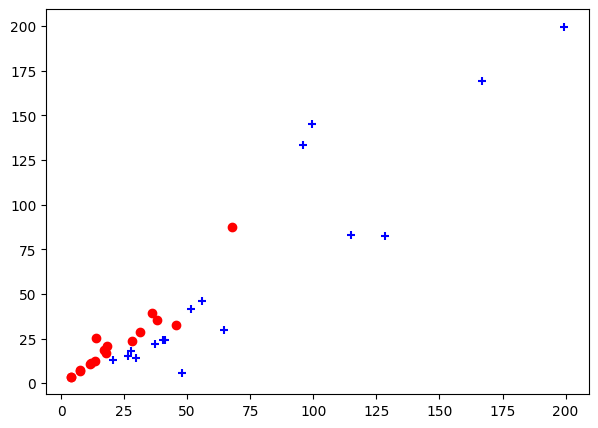

---
seed_number:  182


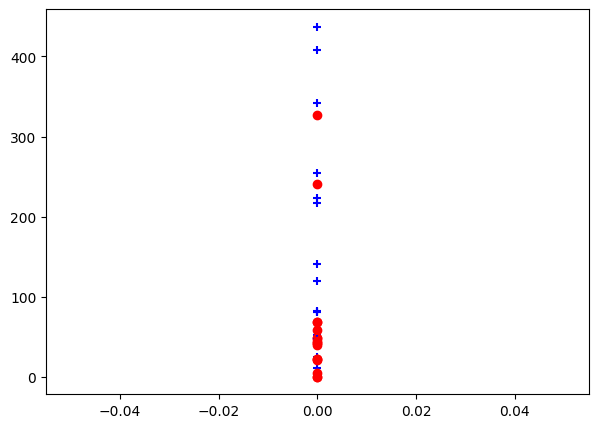

---
seed_number:  183


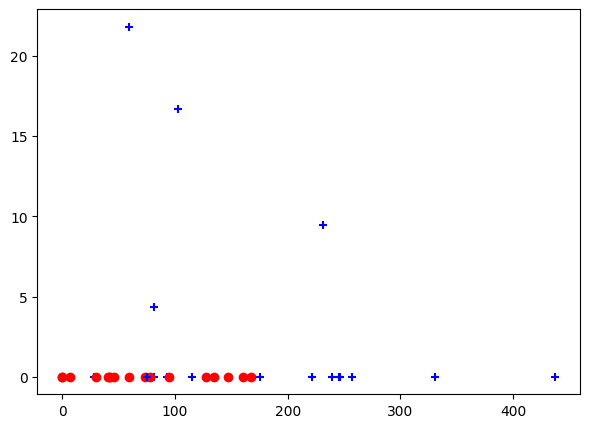

---
seed_number:  184


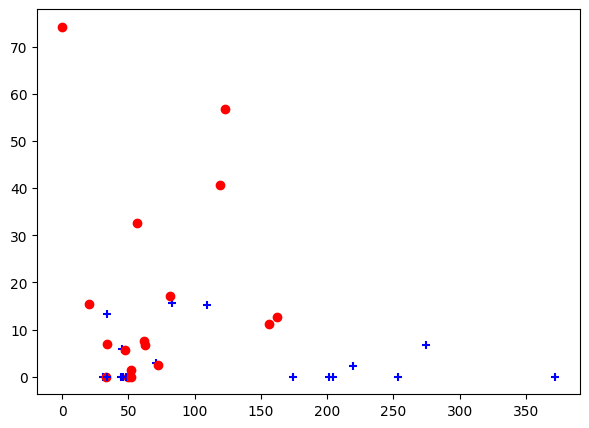

---
seed_number:  185


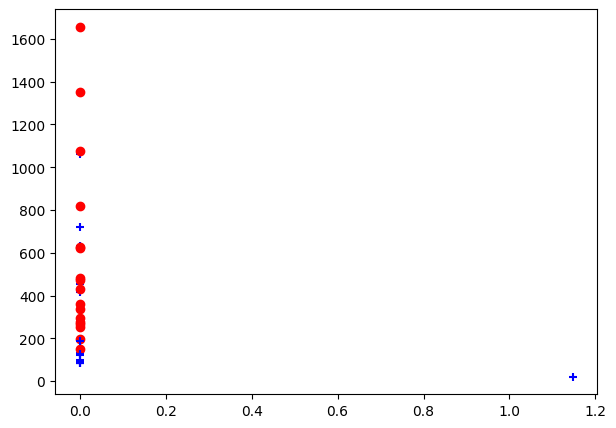

---
seed_number:  186


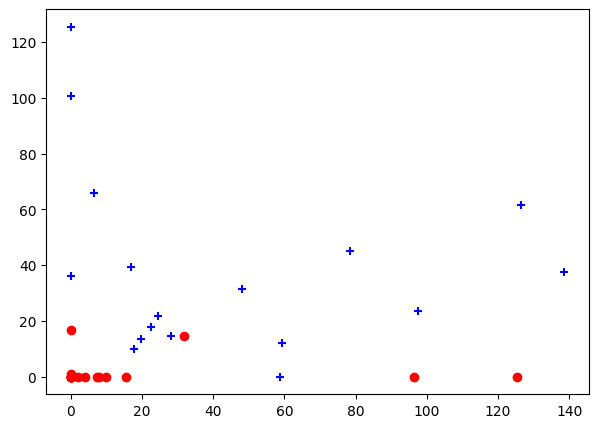

---
seed_number:  187


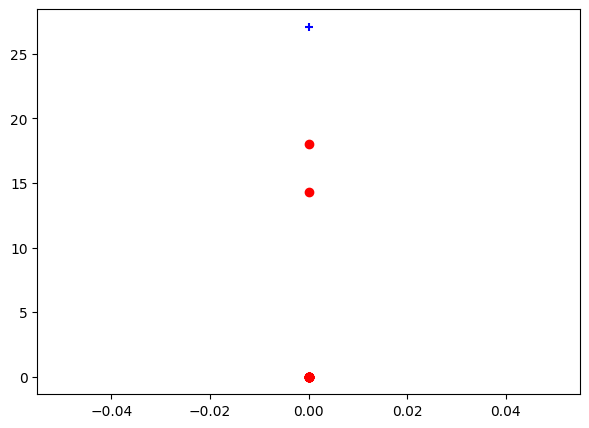

---
seed_number:  188


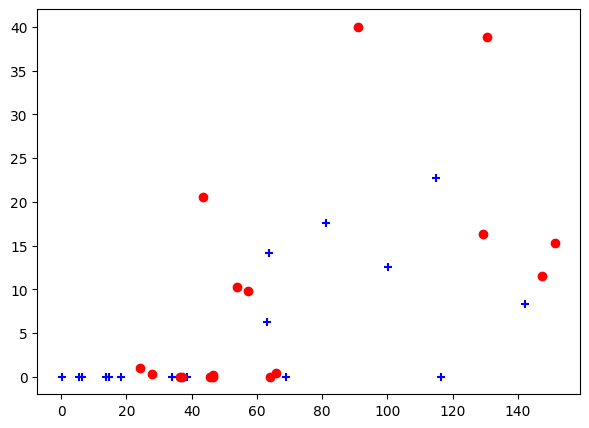

---
seed_number:  189


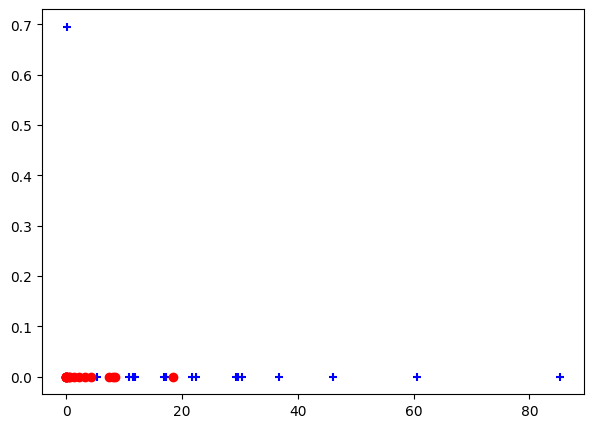

In [48]:
for seed_number in range(91, 190):
    np.random.seed(seed_number)
    print("---")
    print("seed_number: ", seed_number)
    W1 = np.random.normal(loc = 0, scale = 1, size = (number_of_nodes, 4))
    W2 = np.random.normal(loc = 0, size = (W1.shape[1], 2))
    H_layer1 = gcn_kipf_layer(A_hat, D_hat, H, W1)
    H_layer2 = gcn_kipf_layer(A_hat, D_hat, H_layer1, W2)
    nodes_embeddings = {node: np.array(H_layer2)[node] for node in zkc.nodes()}
    display_after_embedding(nodes_embeddings, nodes_labels_binary)